複数のjsonのデータ構造が
```
{
  
  "signal1": [//ここには大量の数列],

	"signal2": [//ここには大量の数列],

	"signal3": [//ここには大量の数列]
}
```
であるファイルを以下の形式に変更する処理
```
{
  "ファイルの名前1": {
    "signal1": [//ここには大量の数列],
	"signal2": [//ここには大量の数列],
	"signal3": [//ここには大量の数列]
  },
  "ファイルの名前2": {
    .
    .
    .
}
```

In [15]:
import json

# ファイル名のリスト（適切なファイル名を指定してください）
file_names = ["2024_01_22_13_07_09.json", "2024_01_22_15_45_01.json", "2024_01_22_15_49_48.json", "2024_01_22_15_55_28.json", "2024_01_22_15_57_59.json"]

# 結果を格納する辞書
result_dict = {}

# 各ファイルに対して処理を行う
for file_name in file_names:
    # ファイルを読み込んでJSONデータを取得
    with open(file_name, 'r') as file:
        data = json.load(file)

    # ファイル名をキーにして辞書に追加
    result_dict[file_name] = data

# 結果を新しいファイルに保存する
with open("output.json", 'w') as output_file:
    json.dump(result_dict, output_file, indent=2)


ファイル参照ができない場合はダウンロードしてください

jsonデータ
https://drive.google.com/file/d/1NyOl4RJQryH988TgrjYQpC5ibLHPW-Nb/view?usp=share_link

sweepデータ
https://drive.google.com/file/d/1jfRxtQ7UZaoVPdWyviAY7XJhbZzIsAcA/view?usp=share_link

jsonデータはFireBase RTDのデータをダウンロードしたものです。連絡いただければ、ユーザー追加のメールを送信しておきます。(それによってfirebaseから直接実験記録のjsonデータをダウンロードできるようになります。)


In [16]:
import json
import matplotlib.pyplot as plt

# JSONファイルのパス
file_path = 'output.json'#'/content/drive/MyDrive/abocado-dc0c2-default-rtdb-myArrayData-export-2.json'
# weep_soundのパス
sound_file_path = '/content/drive/MyDrive/swept_sine.wav'

In [17]:
#時間軸複数読み込み

# JSONファイルから波形データを読み込む
with open(file_path, 'r') as file:
    json_data = json.load(file)

# 日付ごとに処理を行う
for date, data in json_data.items():
    # データが辞書の場合
    if isinstance(data, dict):
        for signal_name, signal_data in data.items():
          """
            plt.figure(figsize=(8, 4))
            plt.plot(signal_data)
            plt.title(f'{date} - {signal_name} Waveform')
            plt.xlabel('Sample')
            plt.ylabel('Amplitude')
            plt.grid(True)
            plt.show()
          """


In [18]:
import numpy as np
from scipy.io import wavfile
import scipy.integrate

# エンベロープ生成関数
def generate_envelope(waveform, sampling_rate, f_start, f_end):
    waveform = waveform[::-1]  # 波形を逆順にする
    max_amplitude = np.max(waveform) if len(waveform) > 0 else 0.0
    t_max = len(waveform) / sampling_rate

    scale_factor = pow(f_end / f_start, 1.0 / t_max) / t_max

    envelope = [sample * max_amplitude * scale_factor for sample in waveform]

    # 両端に24000個のゼロパディングを追加
    envelope = np.pad(envelope, (24000, 24000), mode='constant')

    print("エンベロープ作成完了", envelope[0], envelope[-1])
    return envelope

# extended_sweep_sound.wavのデータを読み込む
sample_rate, sound_data = wavfile.read(sound_file_path)

# エンベロープ生成
env = generate_envelope(sound_data.astype(float), sample_rate, 10, 24000)


エンベロープ作成完了 0.0 0.0


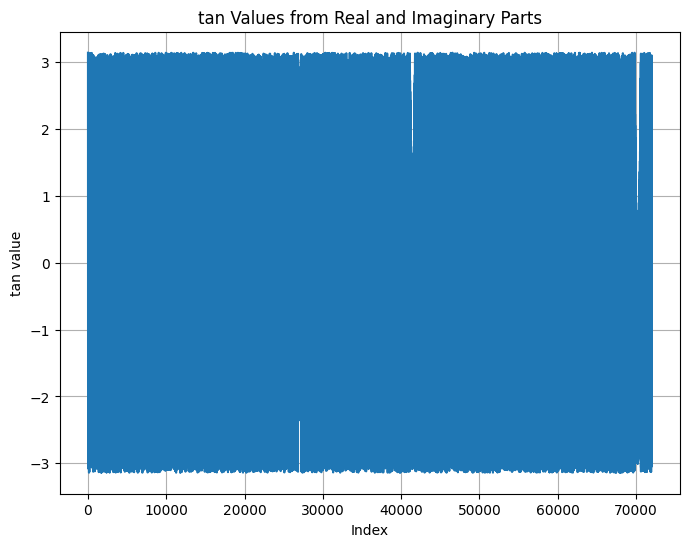

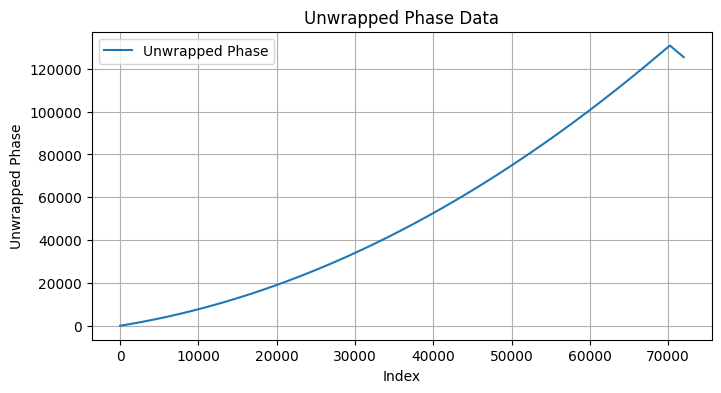

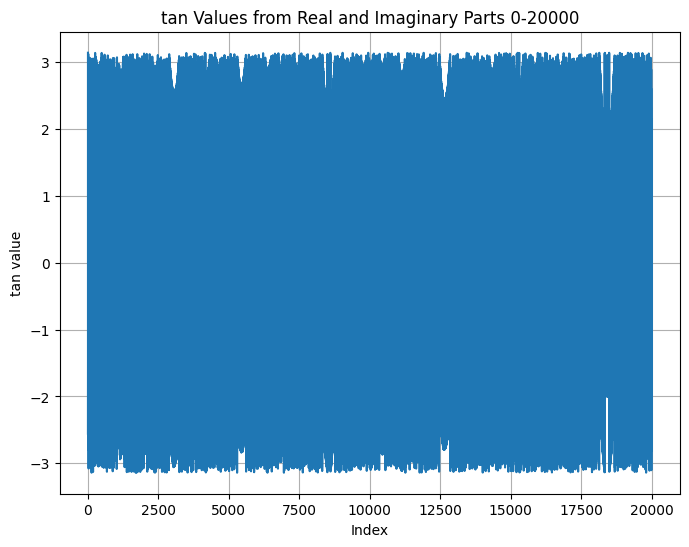

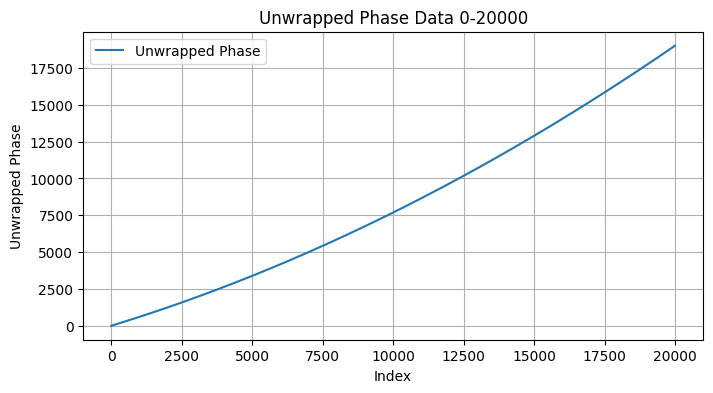

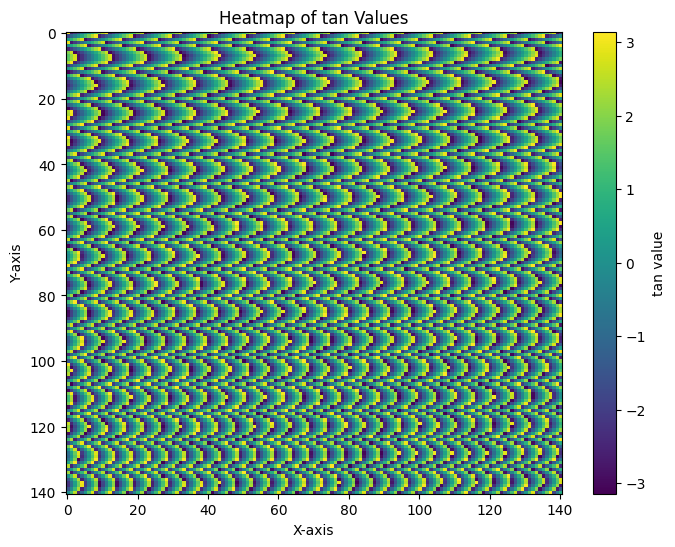

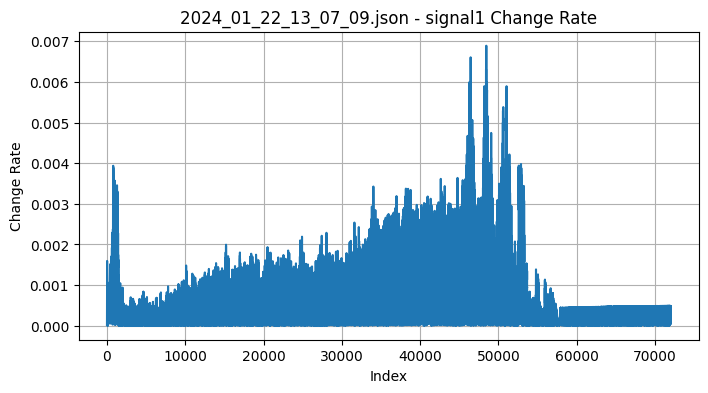

2024_01_22_13_07_09.json - signal1 Mean Change Rate: 0.0007033610068807215


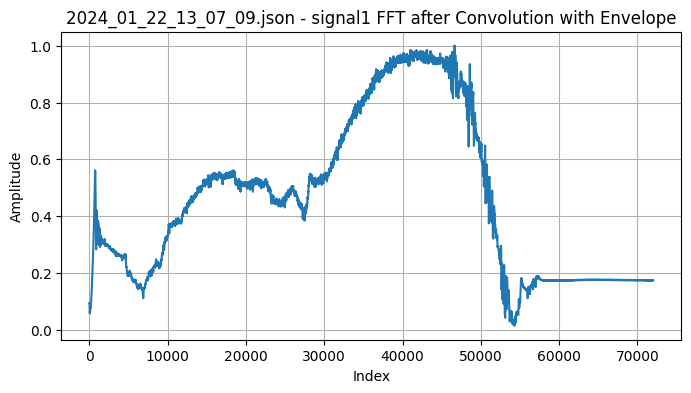

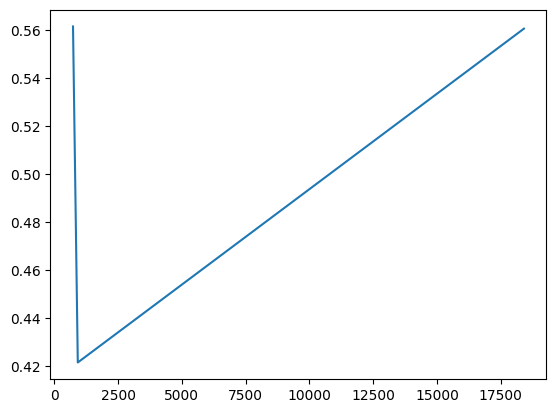

2024_01_22_13_07_09.json - signal1 Integral: 1259.900961431284


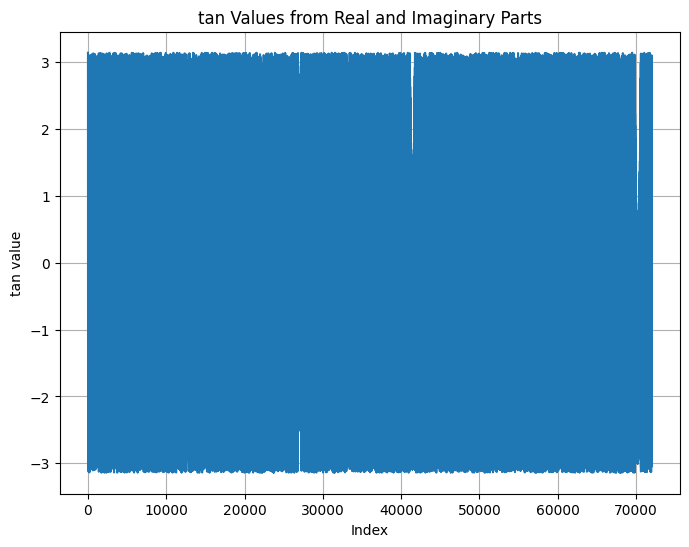

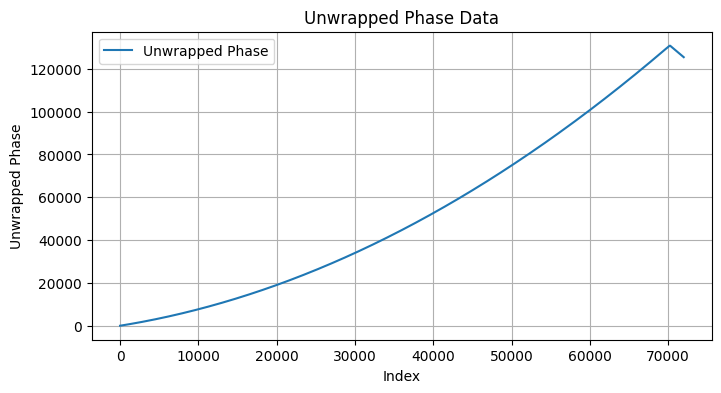

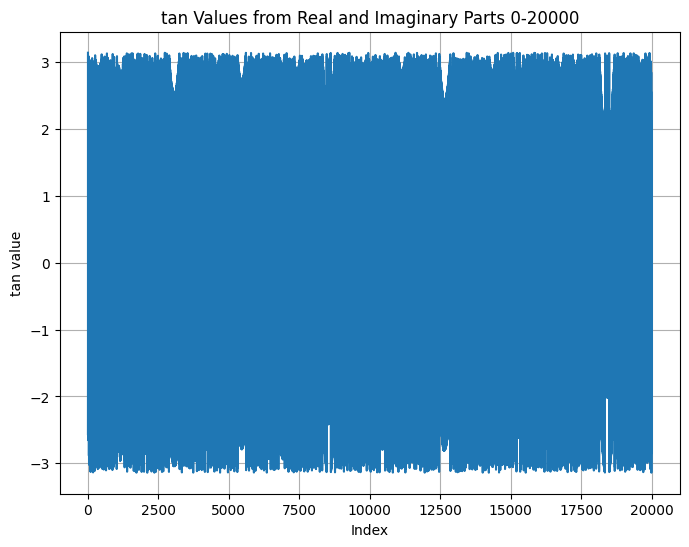

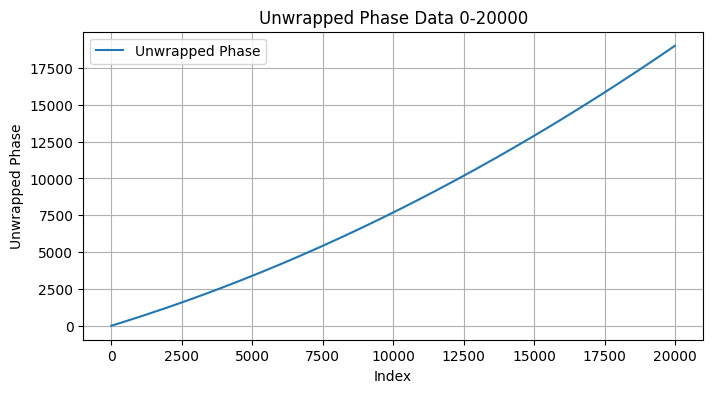

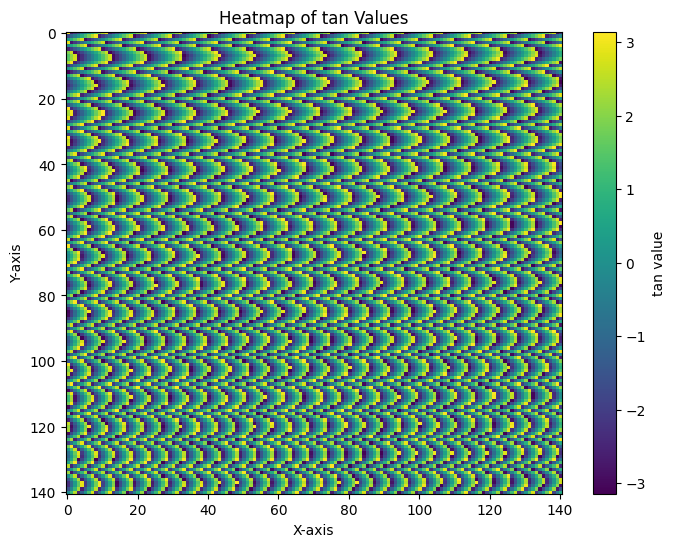

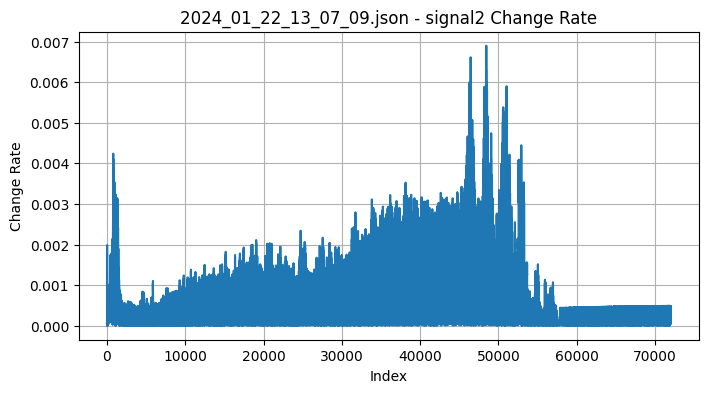

2024_01_22_13_07_09.json - signal2 Mean Change Rate: 0.0007082933723263959


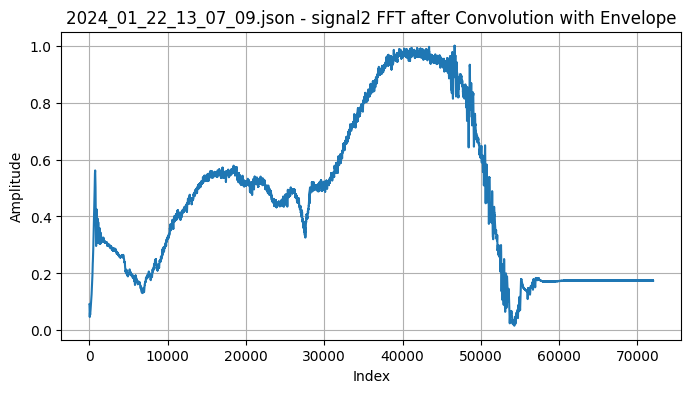

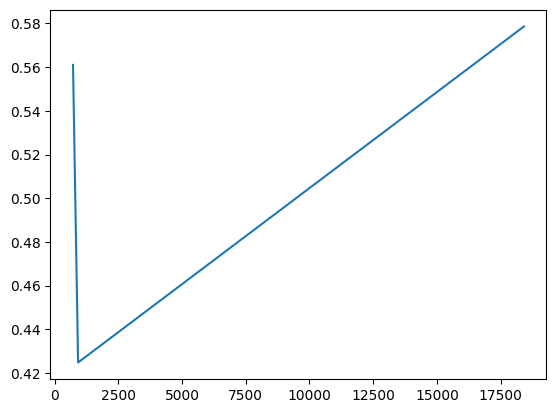

2024_01_22_13_07_09.json - signal2 Integral: 1279.47747674134


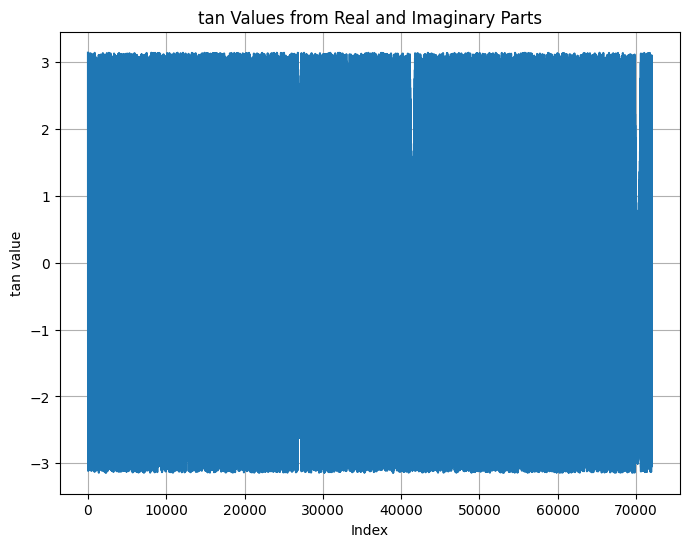

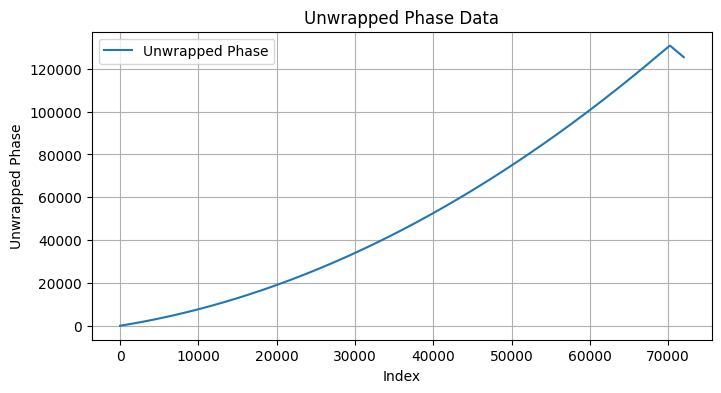

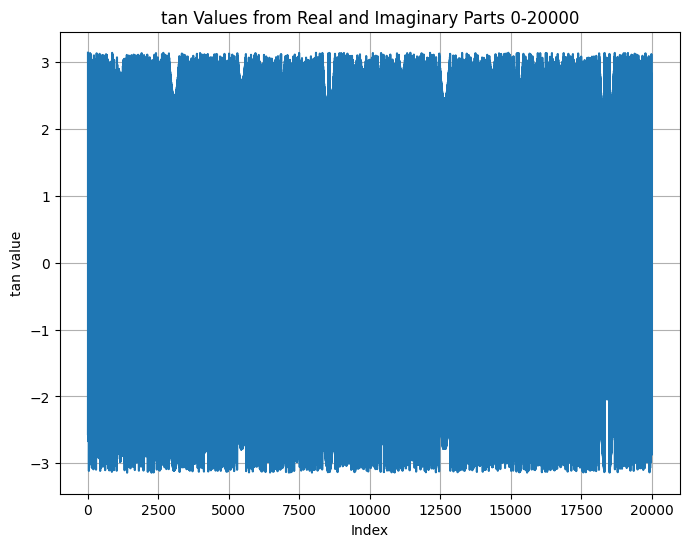

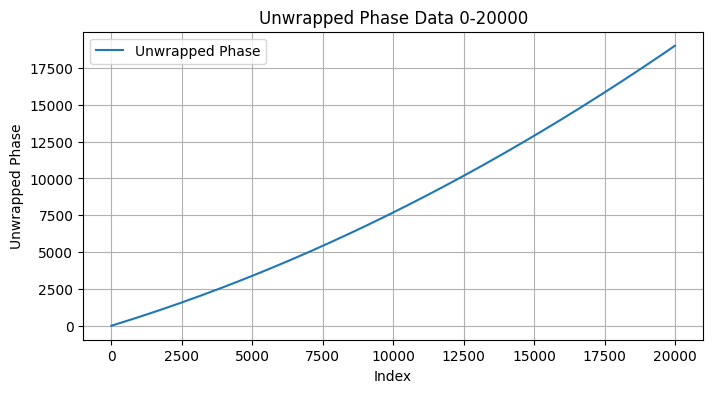

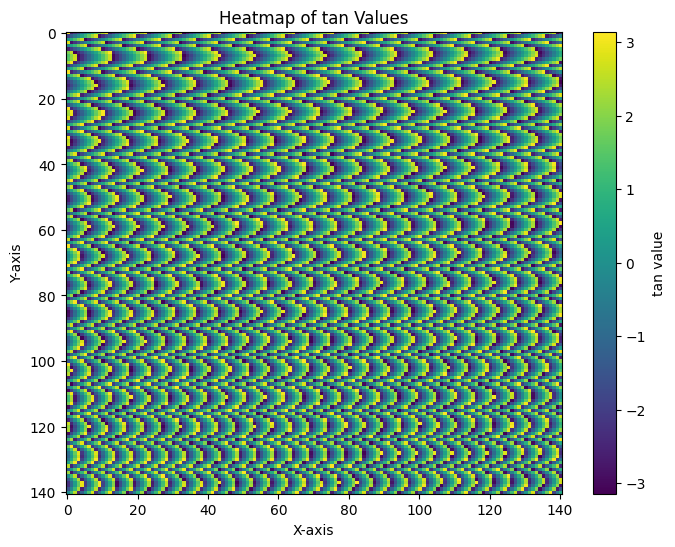

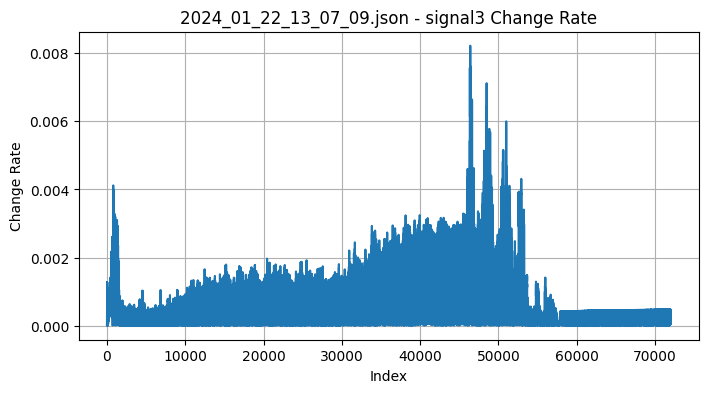

2024_01_22_13_07_09.json - signal3 Mean Change Rate: 0.0006914462425098073


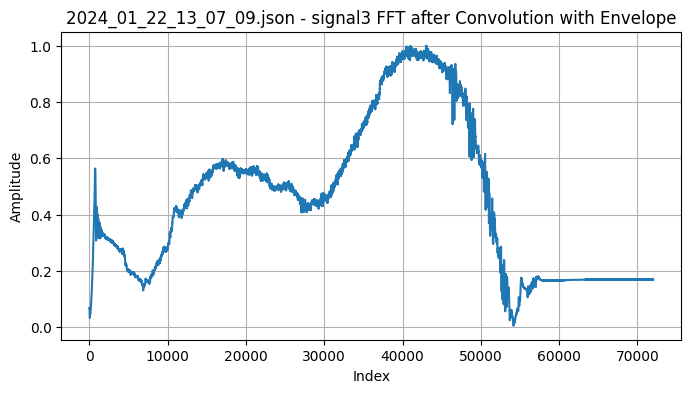

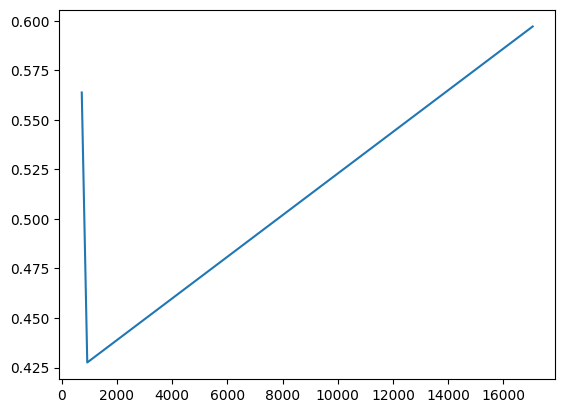

2024_01_22_13_07_09.json - signal3 Integral: 1323.7828696522424


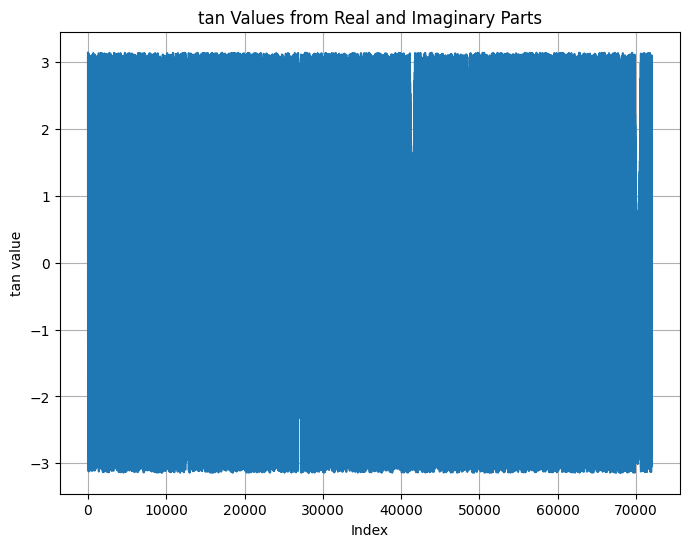

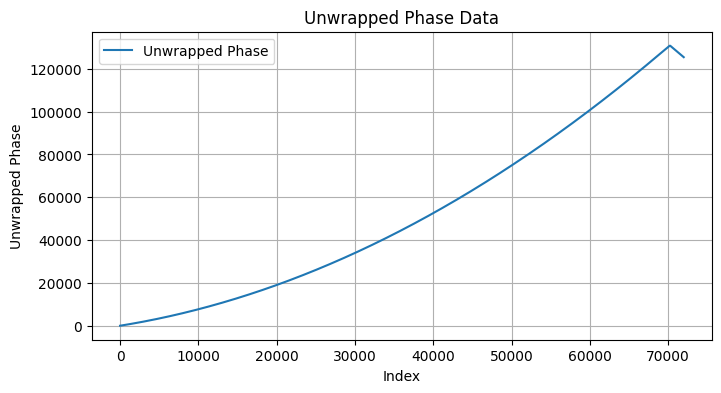

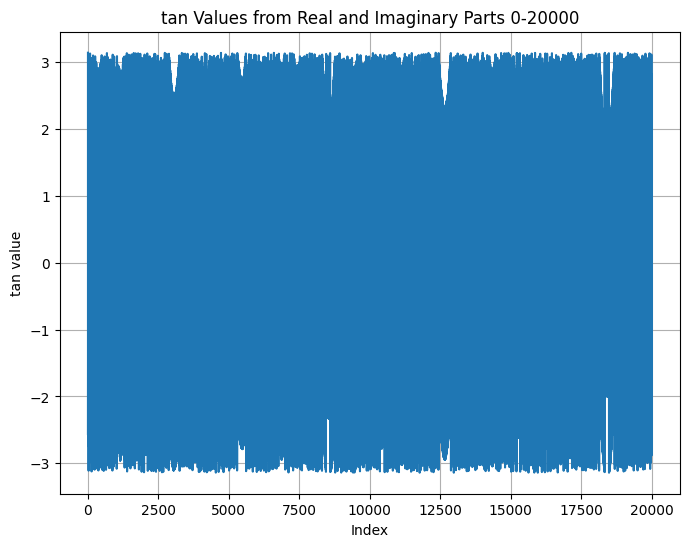

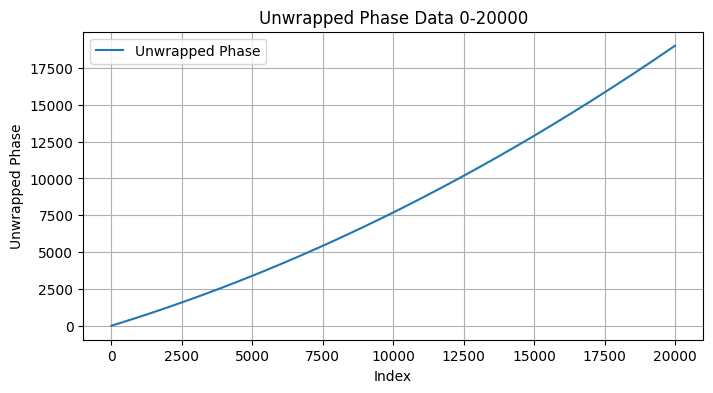

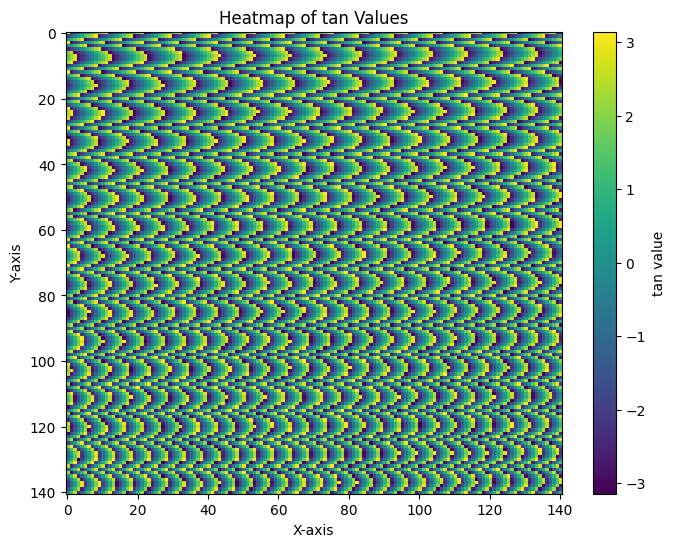

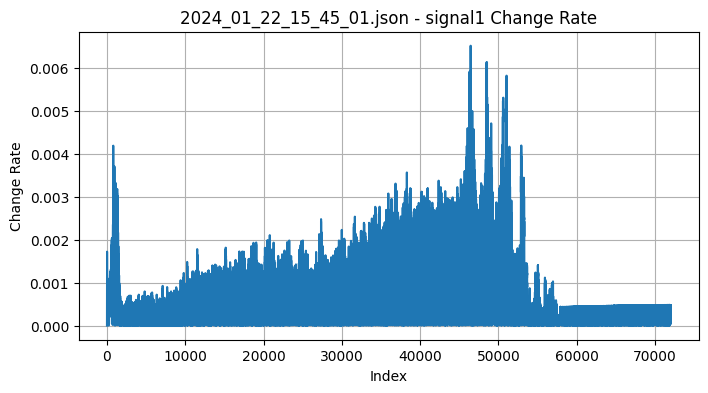

2024_01_22_15_45_01.json - signal1 Mean Change Rate: 0.0006904963894569915


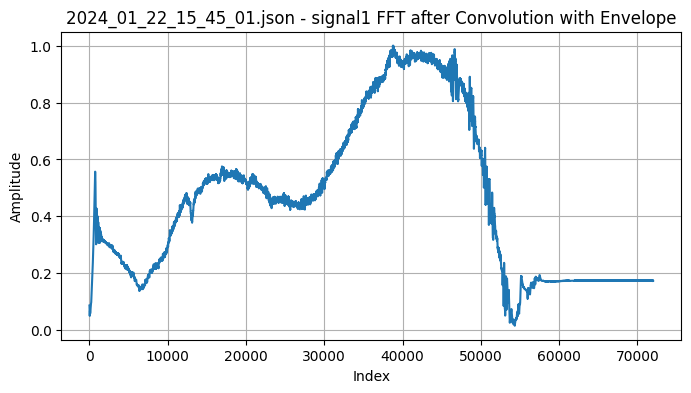

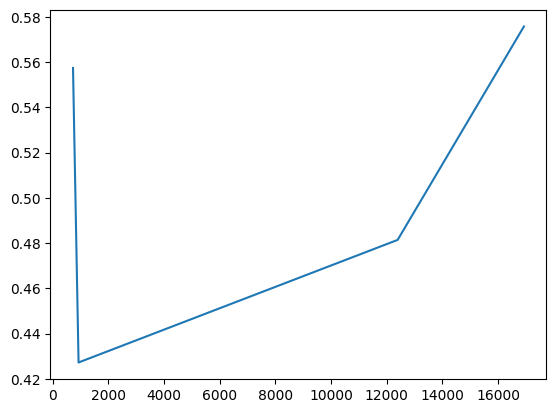

2024_01_22_15_45_01.json - signal1 Integral: 1262.471459828628


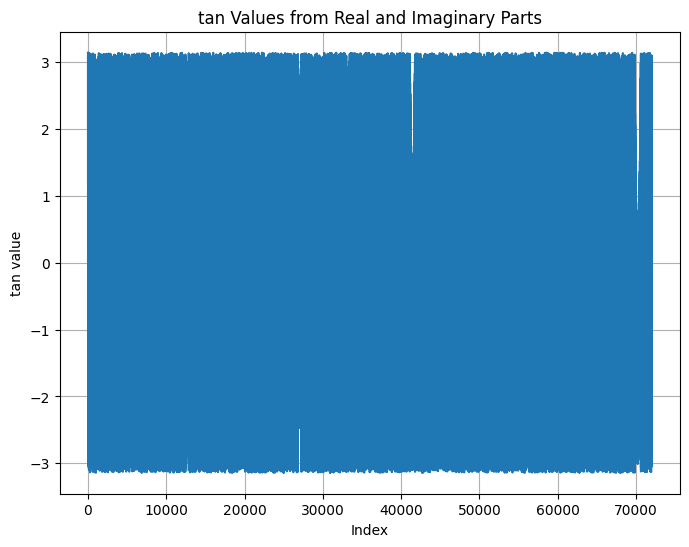

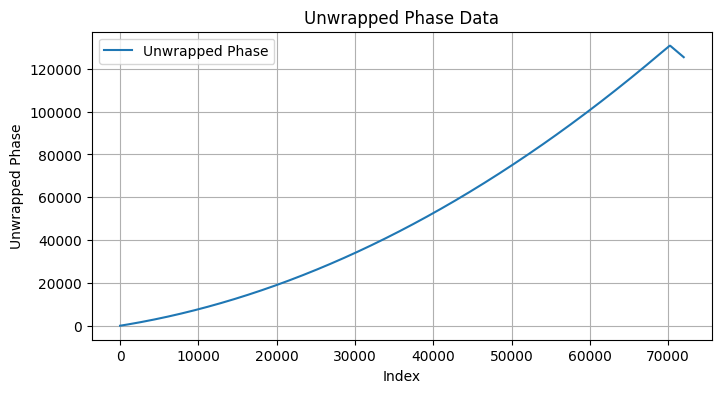

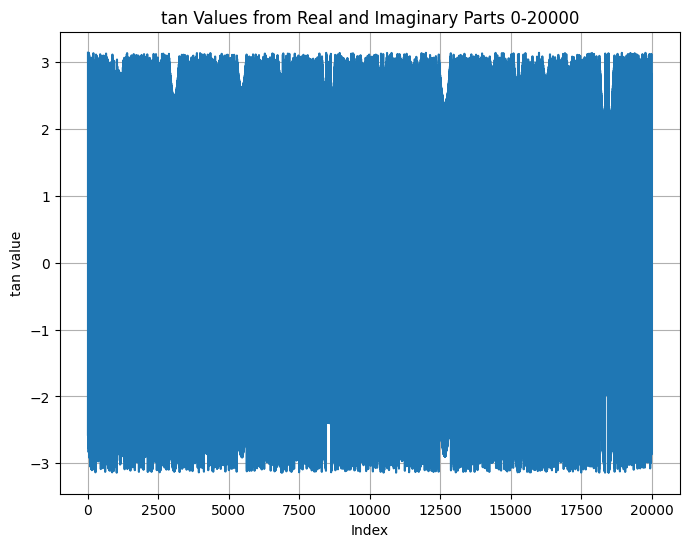

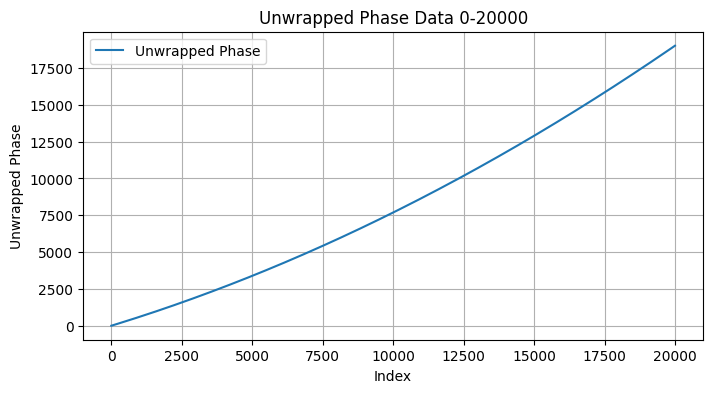

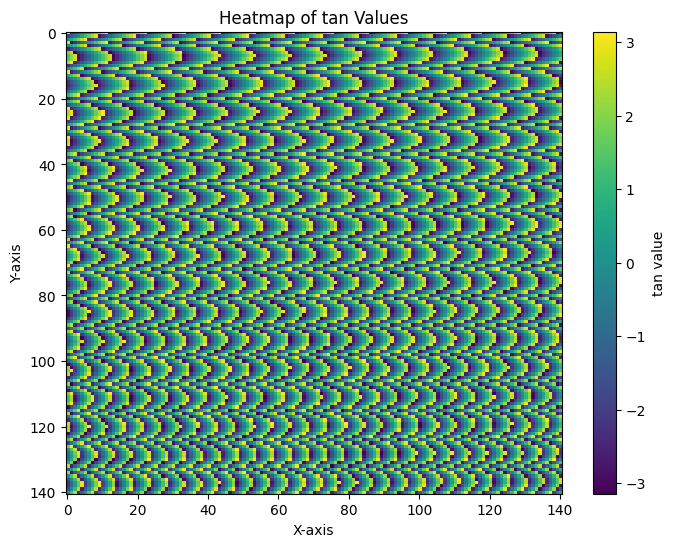

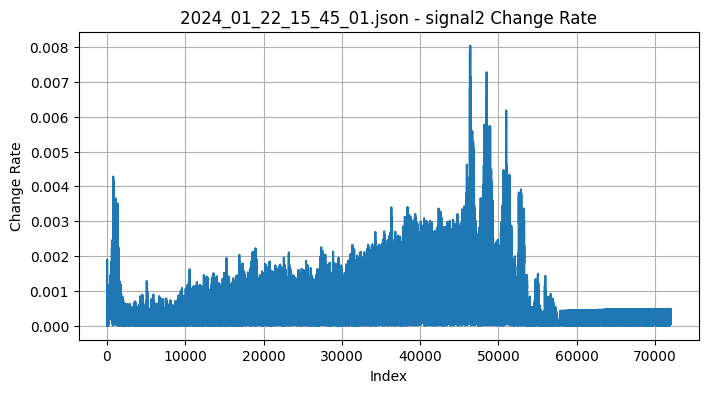

2024_01_22_15_45_01.json - signal2 Mean Change Rate: 0.0007079157356070916


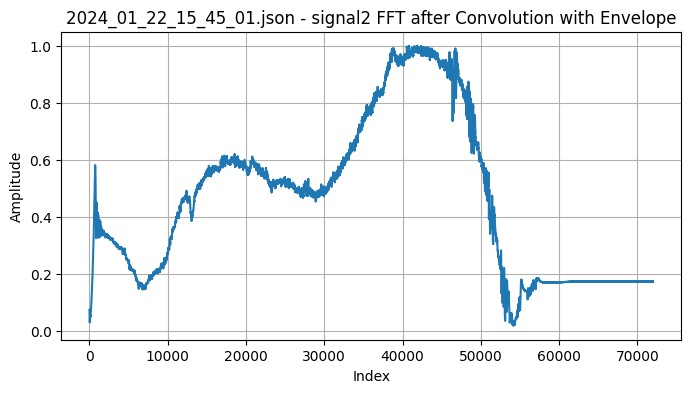

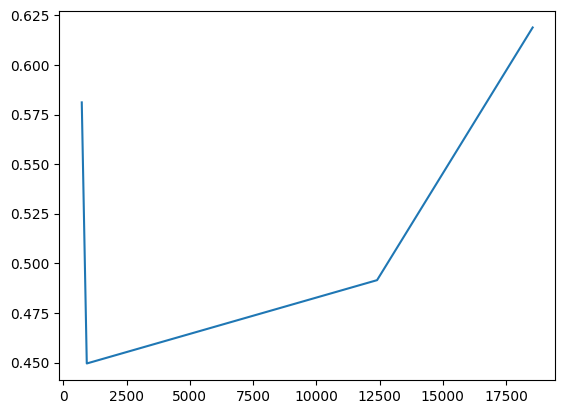

2024_01_22_15_45_01.json - signal2 Integral: 1347.0049132464837


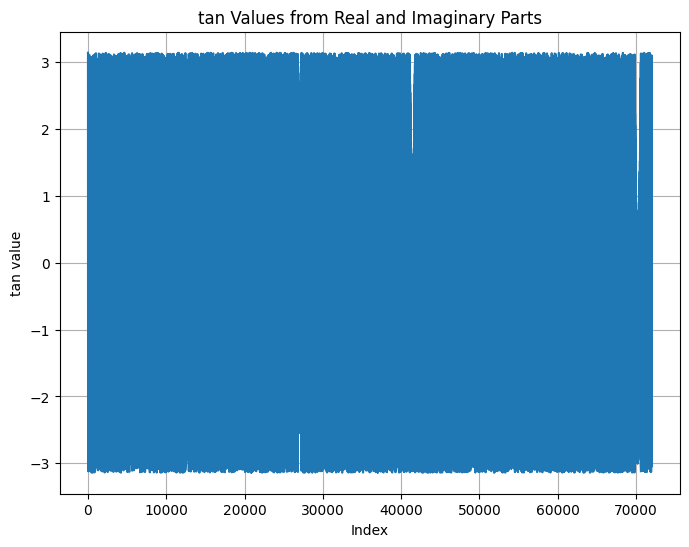

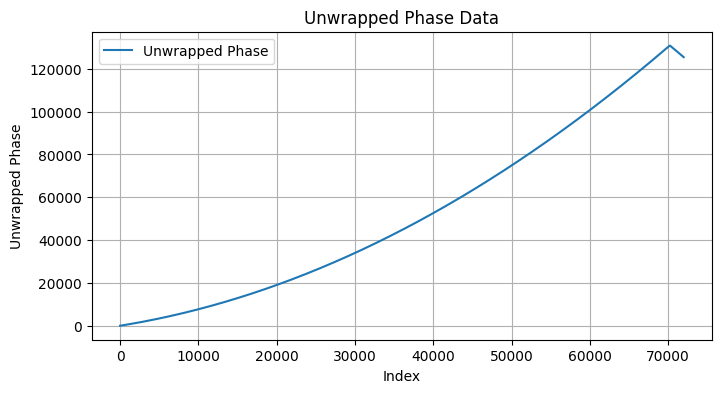

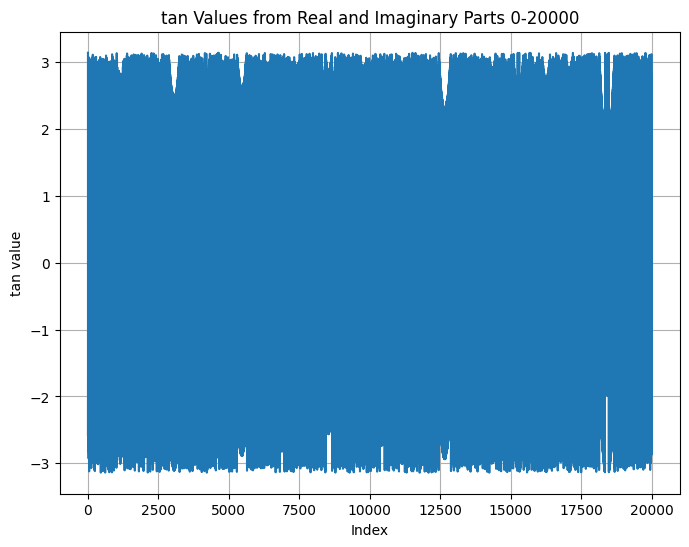

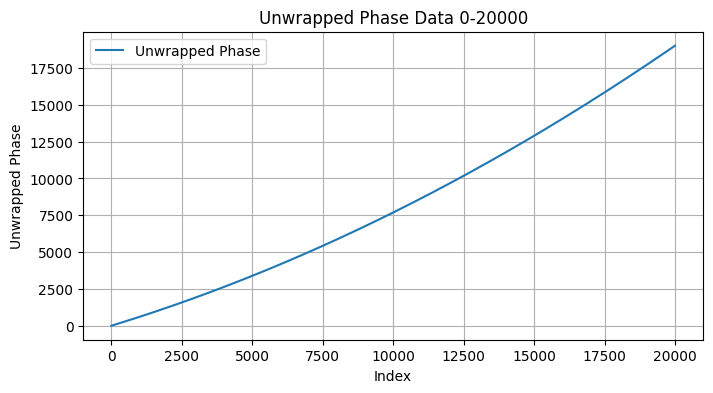

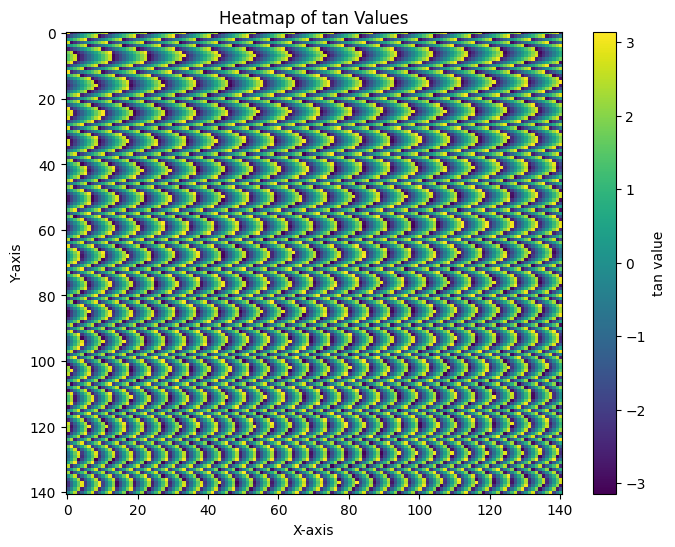

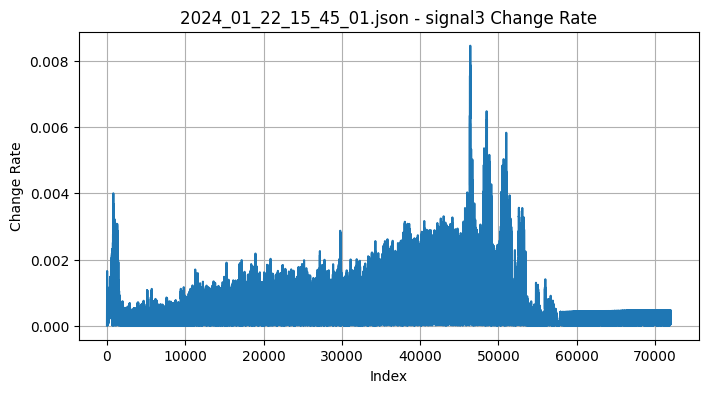

2024_01_22_15_45_01.json - signal3 Mean Change Rate: 0.000683956034947151


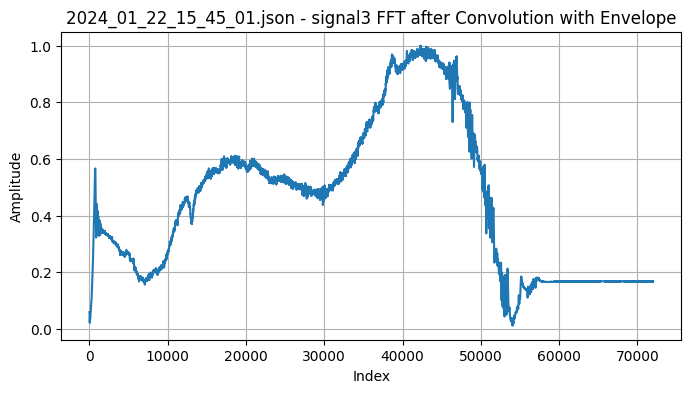

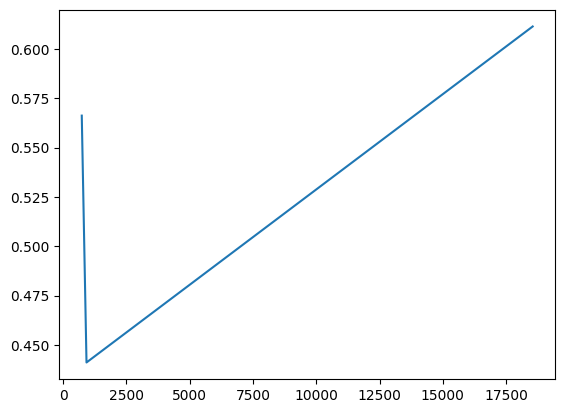

2024_01_22_15_45_01.json - signal3 Integral: 1332.3028155692757


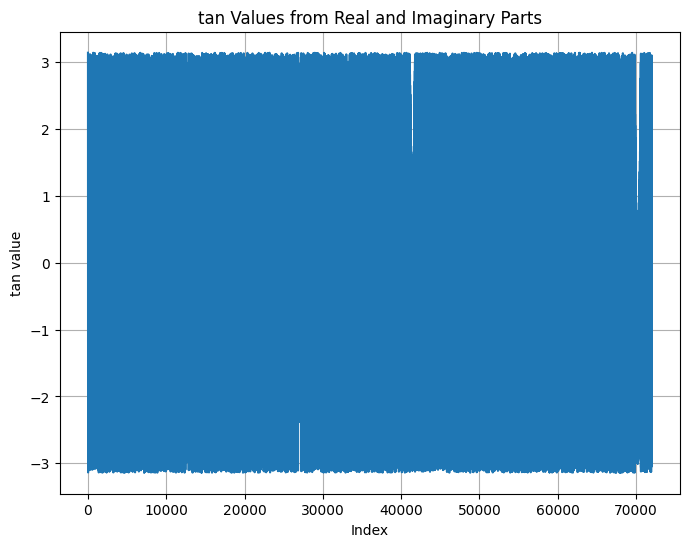

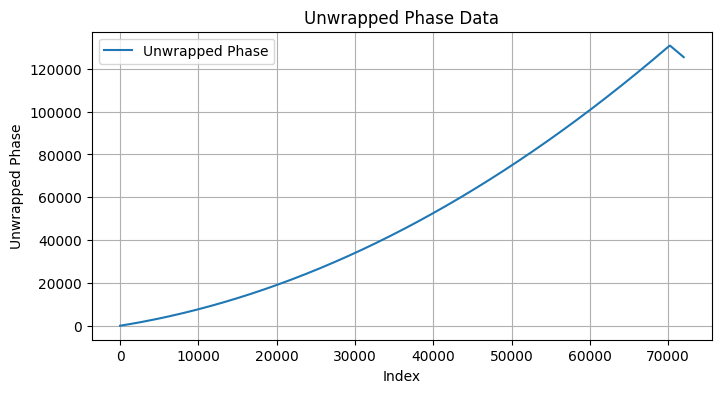

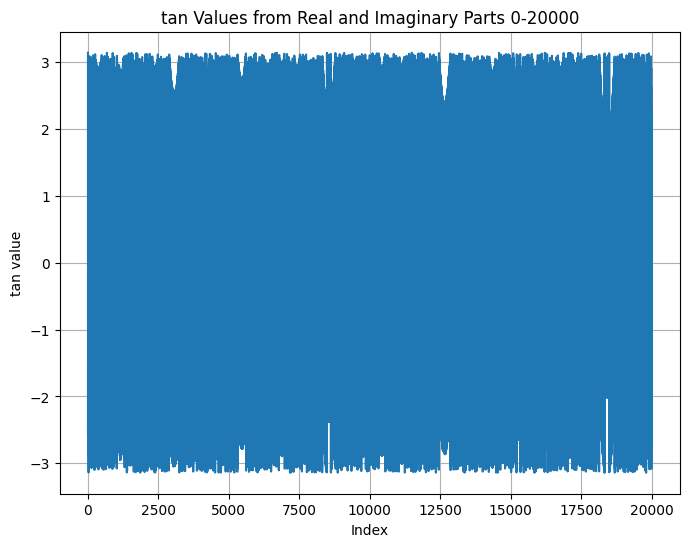

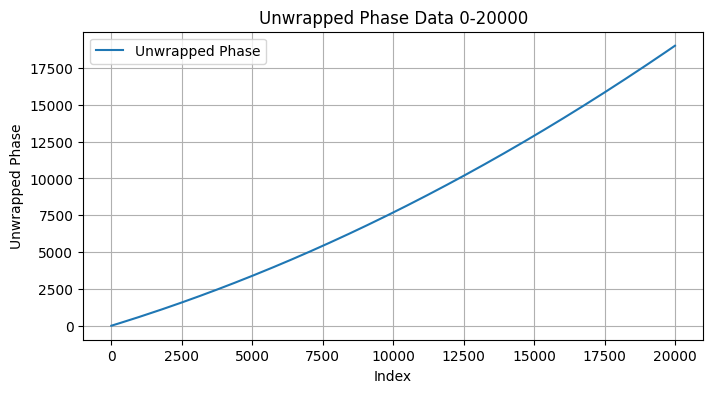

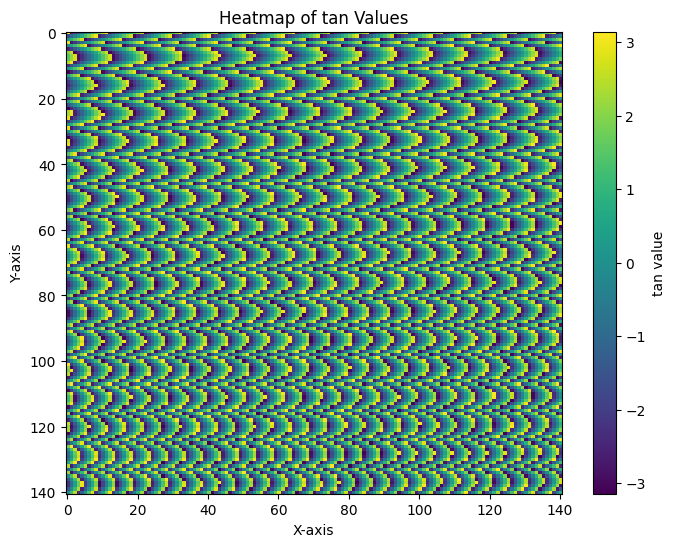

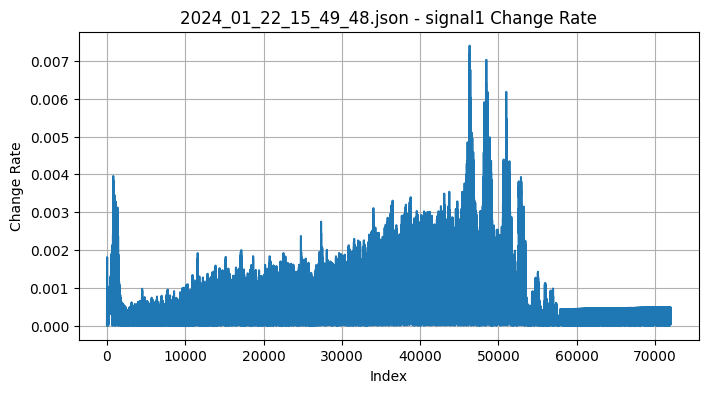

2024_01_22_15_49_48.json - signal1 Mean Change Rate: 0.0006986215454222062


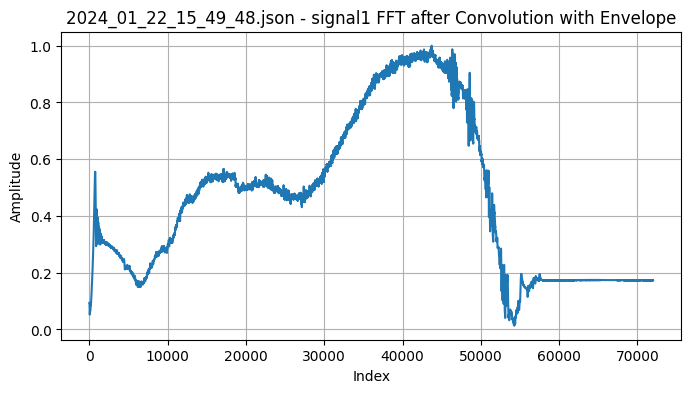

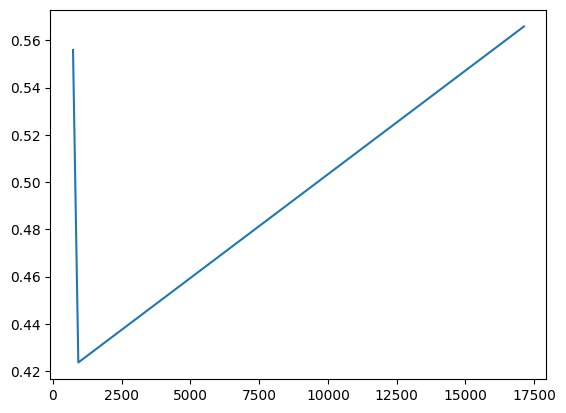

2024_01_22_15_49_48.json - signal1 Integral: 1266.670488267028


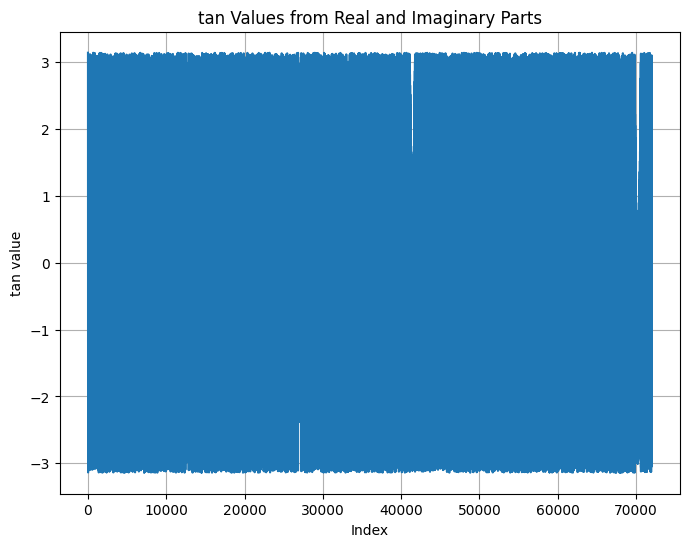

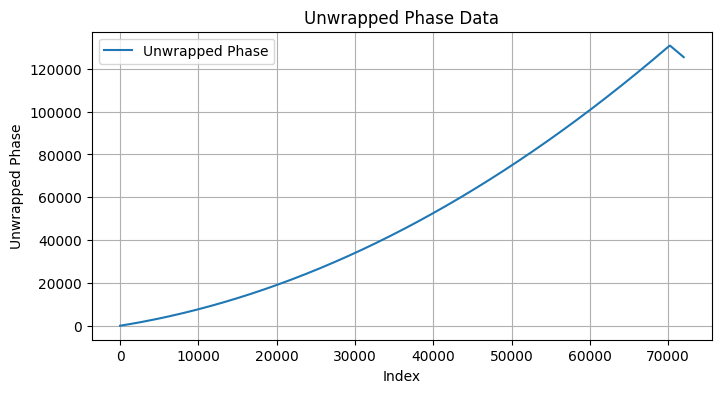

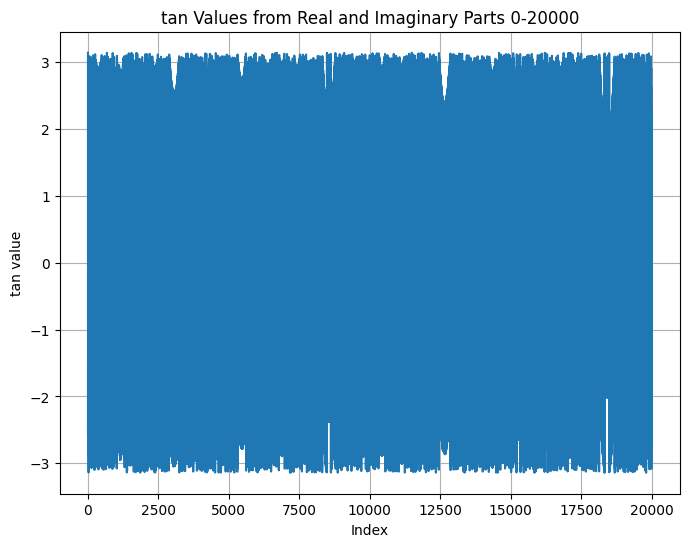

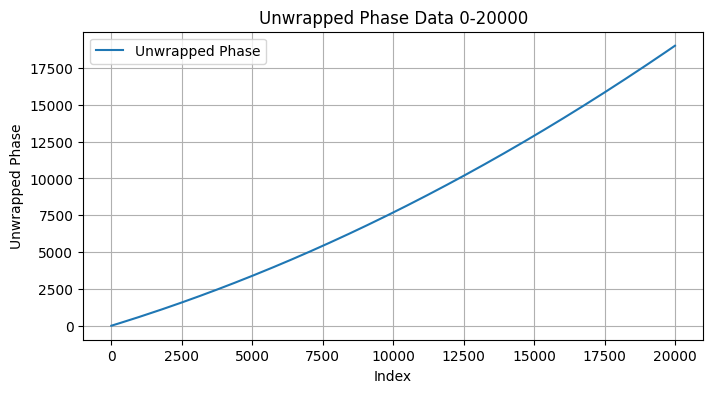

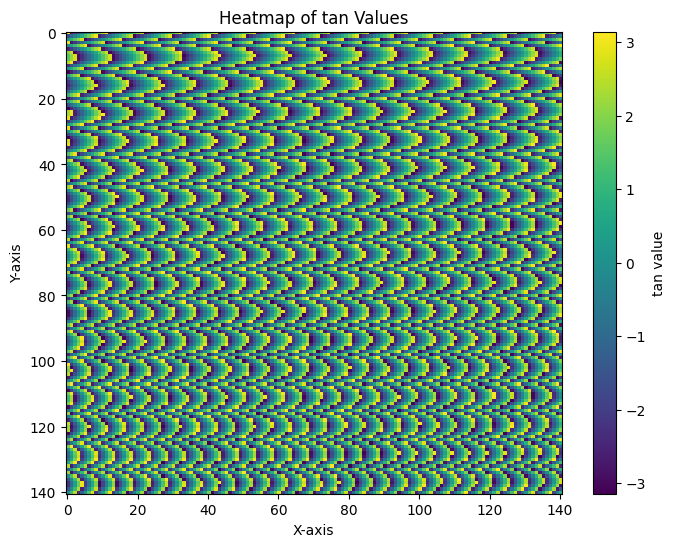

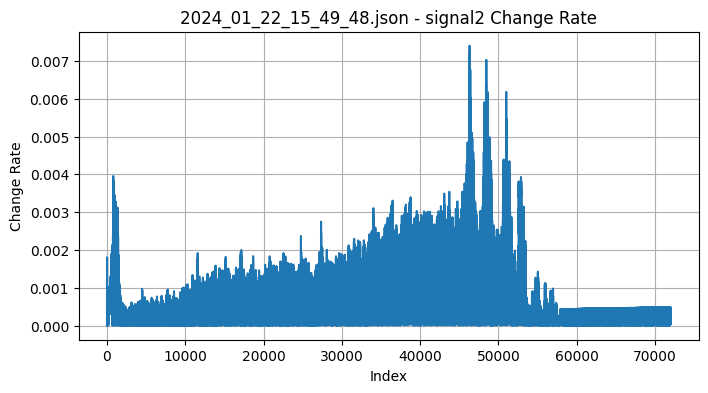

2024_01_22_15_49_48.json - signal2 Mean Change Rate: 0.0006986215454222062


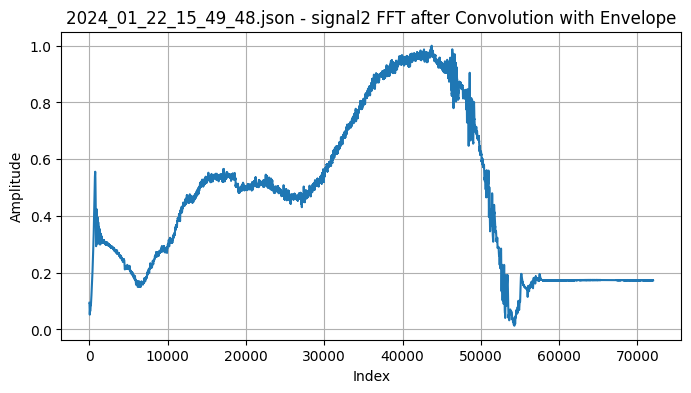

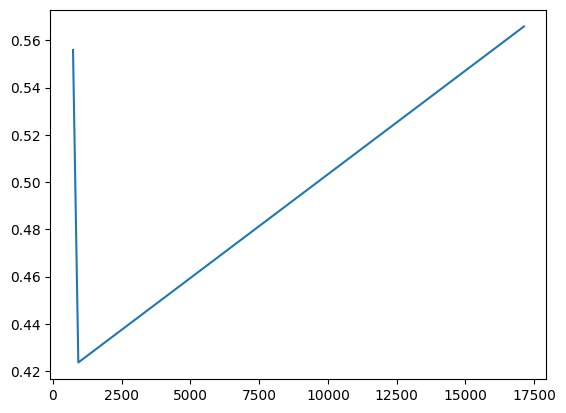

2024_01_22_15_49_48.json - signal2 Integral: 1266.670488267028


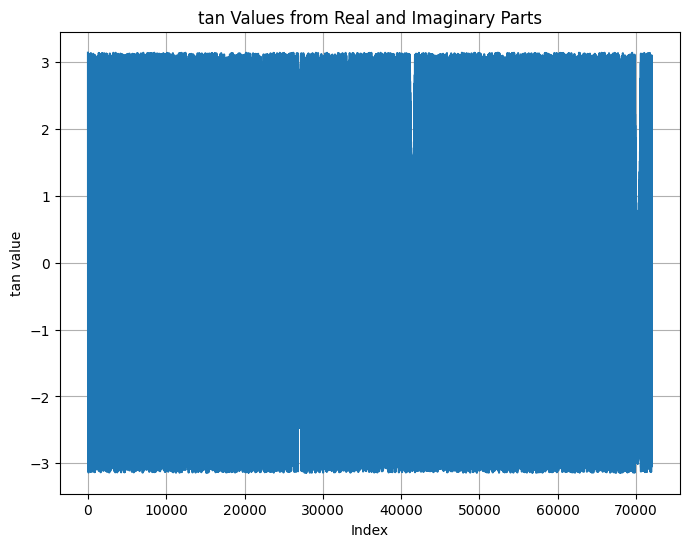

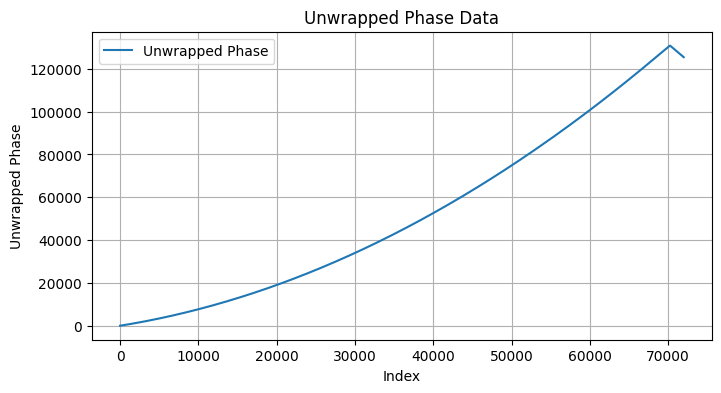

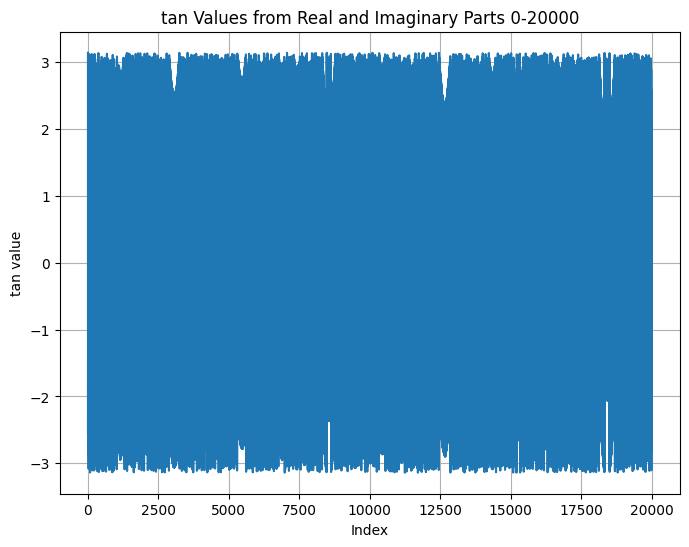

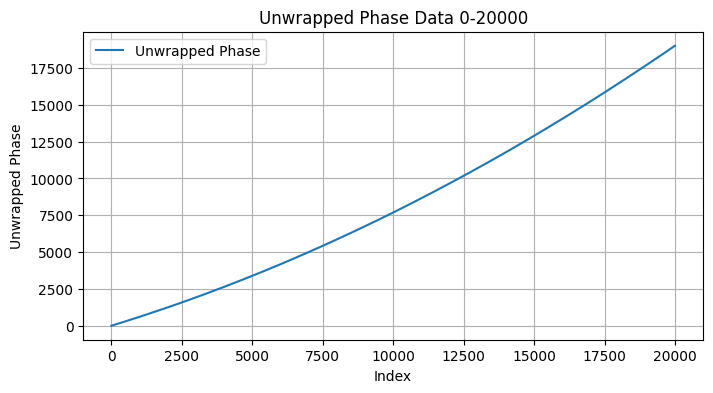

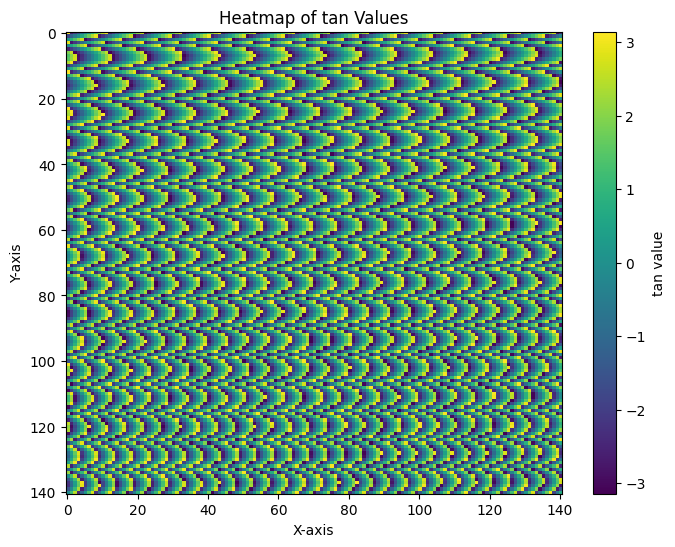

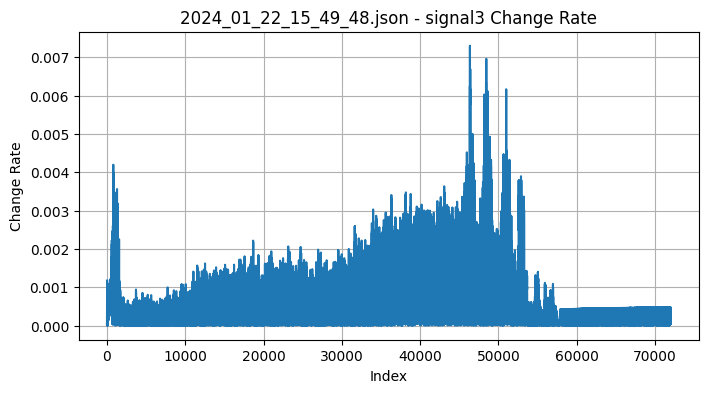

2024_01_22_15_49_48.json - signal3 Mean Change Rate: 0.0006944841803503154


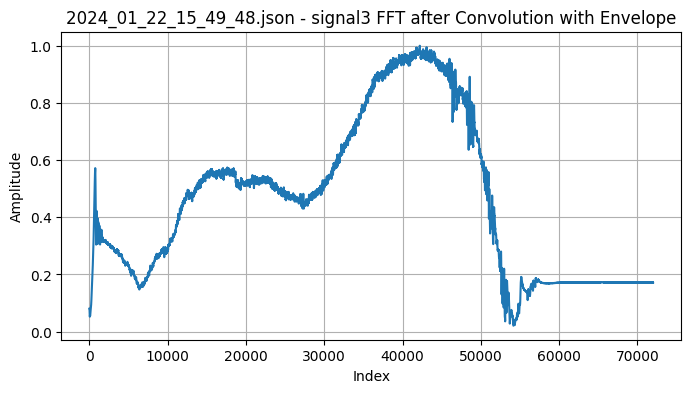

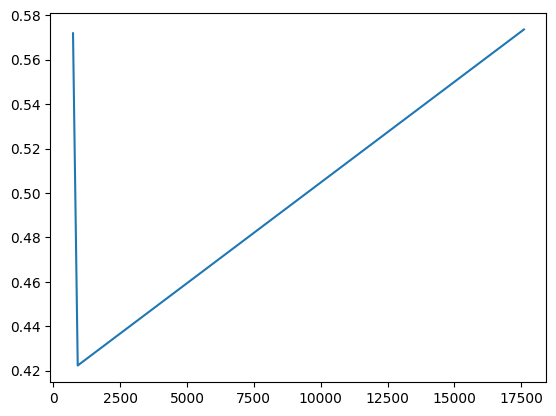

2024_01_22_15_49_48.json - signal3 Integral: 1302.064924413526


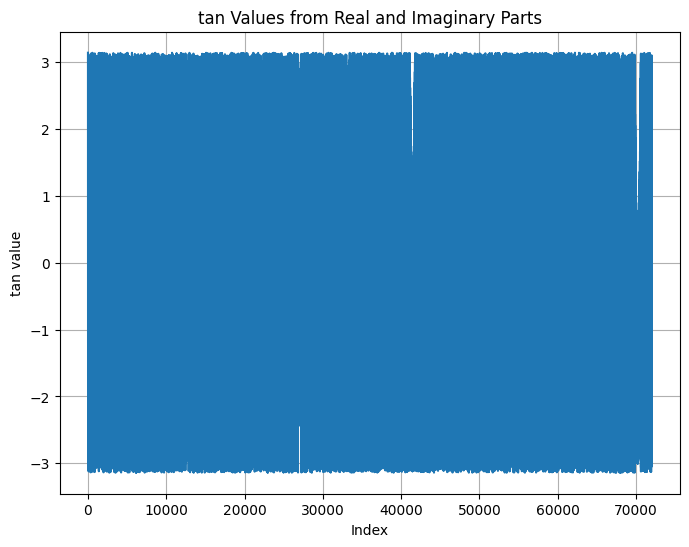

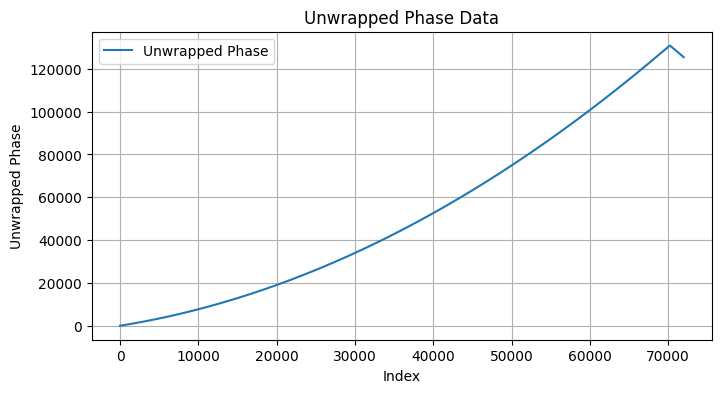

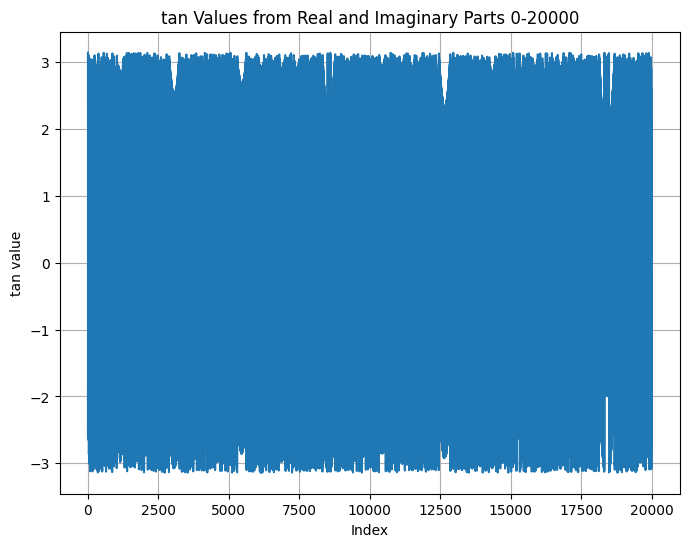

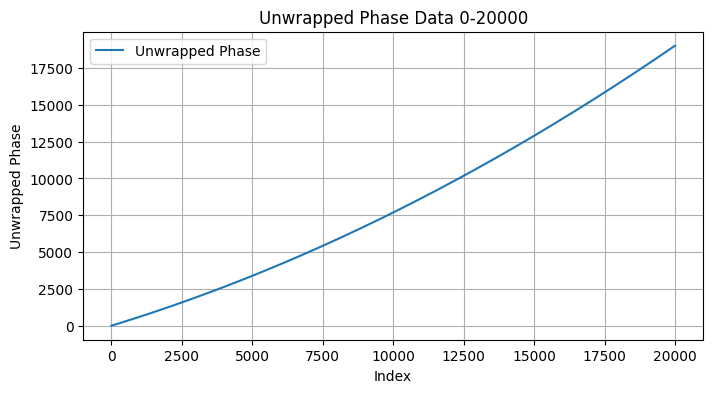

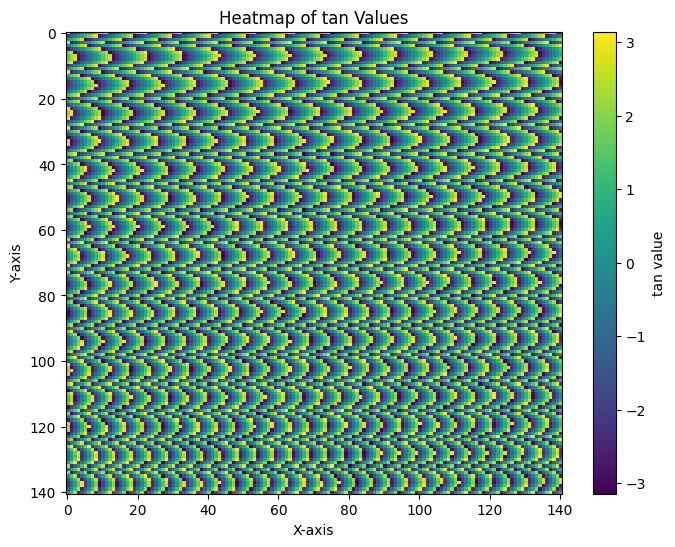

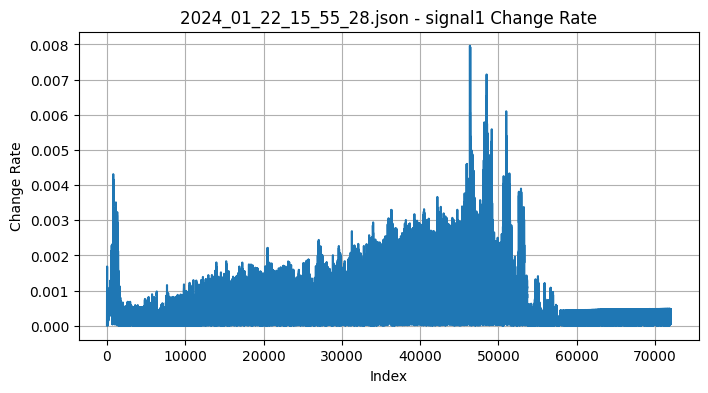

2024_01_22_15_55_28.json - signal1 Mean Change Rate: 0.000703036589807617


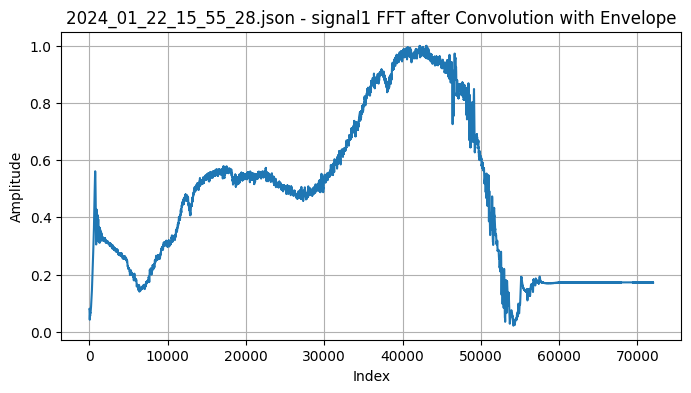

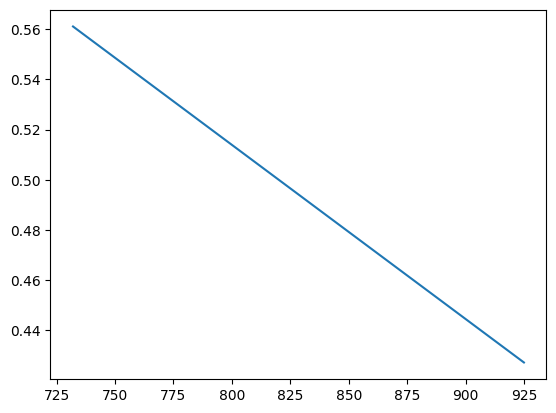

2024_01_22_15_55_28.json - signal1 Integral: 1316.809773873427


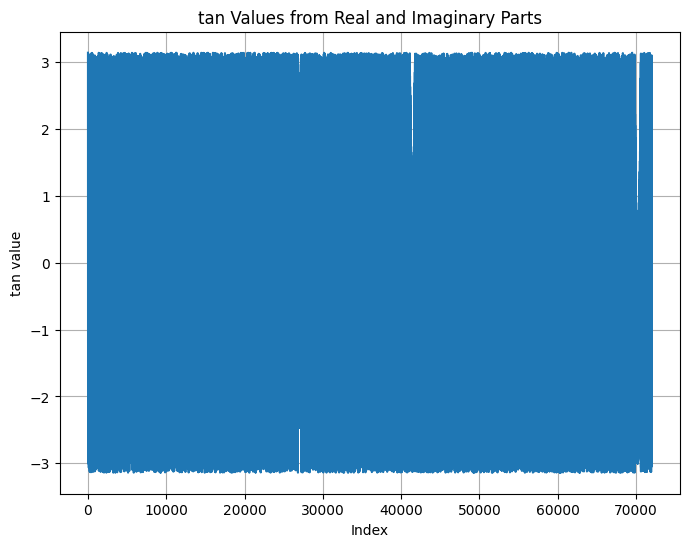

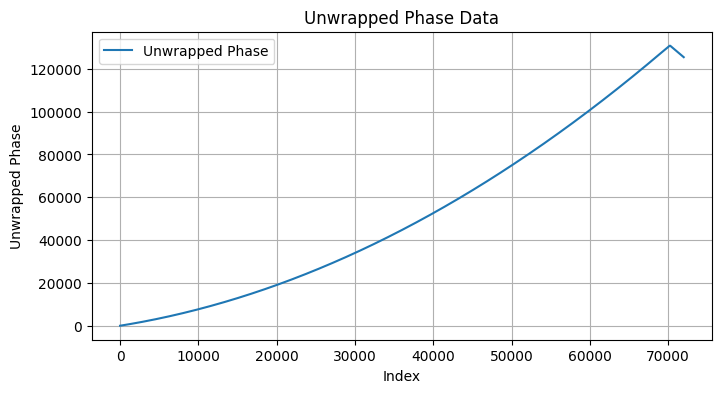

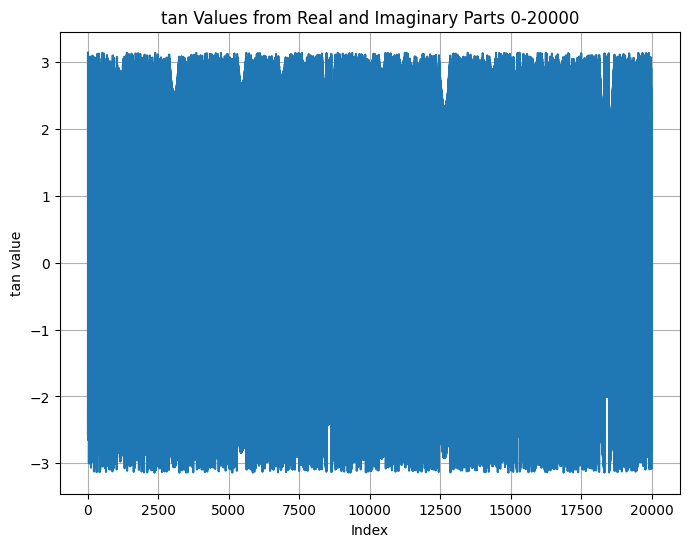

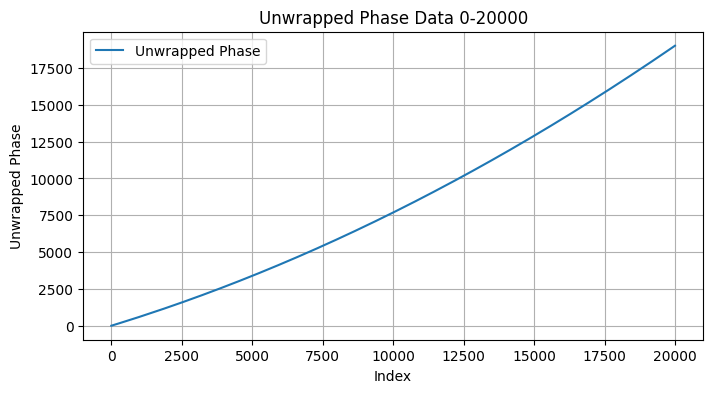

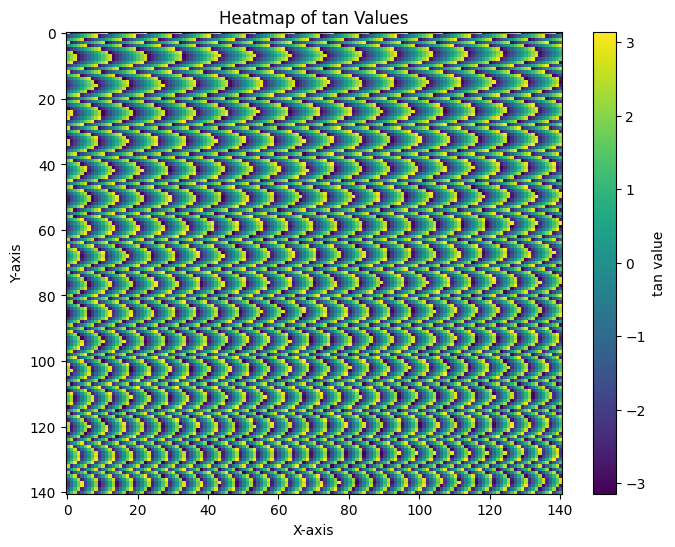

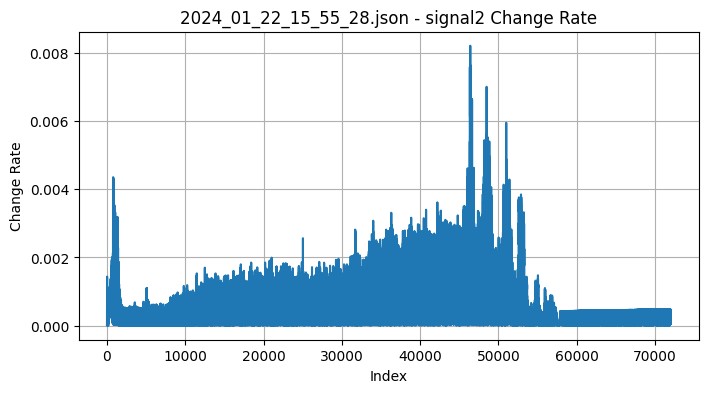

2024_01_22_15_55_28.json - signal2 Mean Change Rate: 0.0006969587732856313


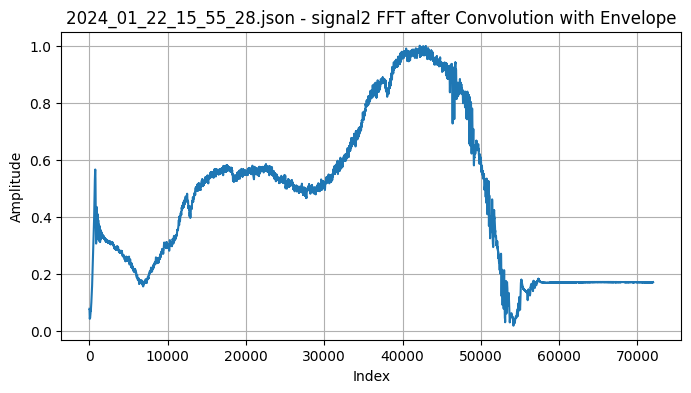

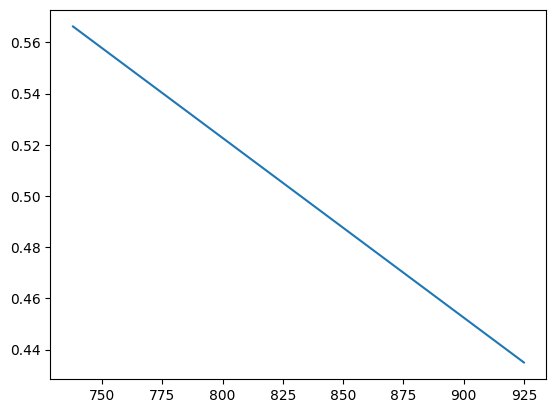

2024_01_22_15_55_28.json - signal2 Integral: 1328.2879827664517


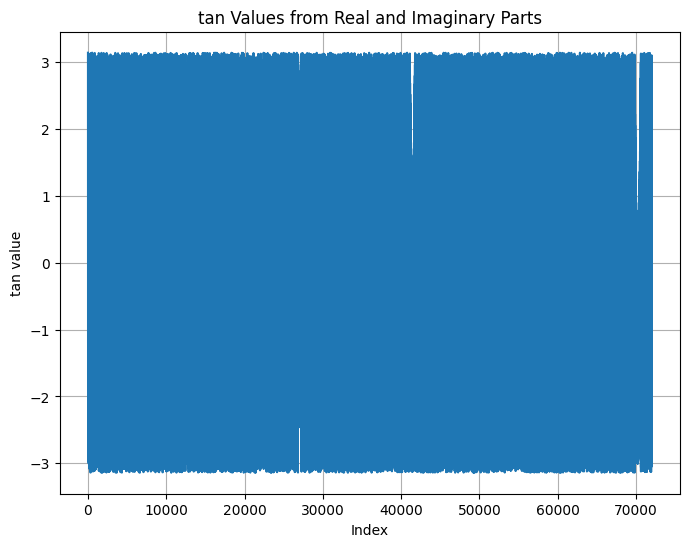

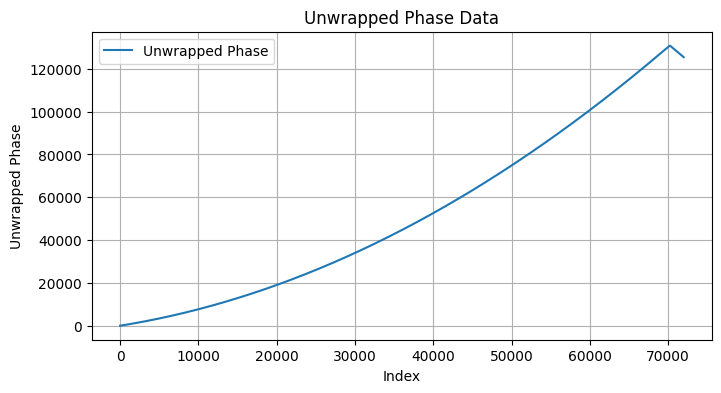

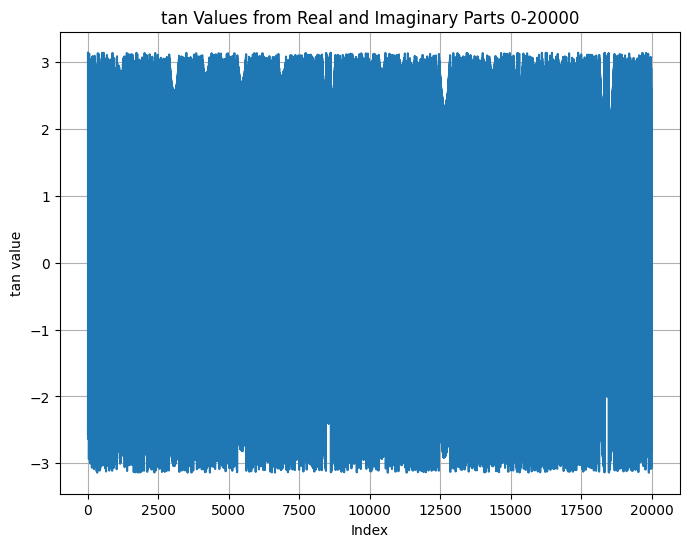

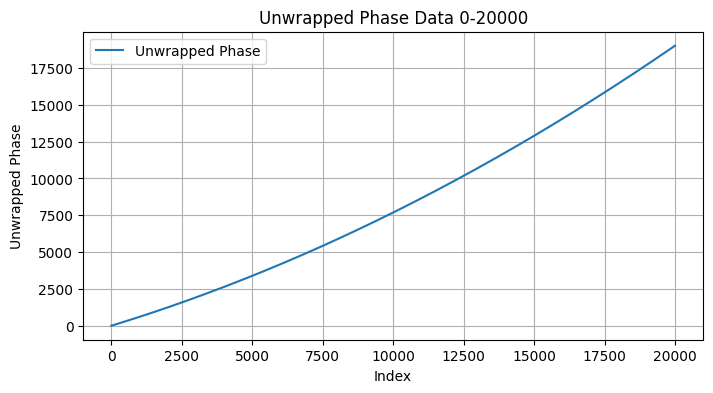

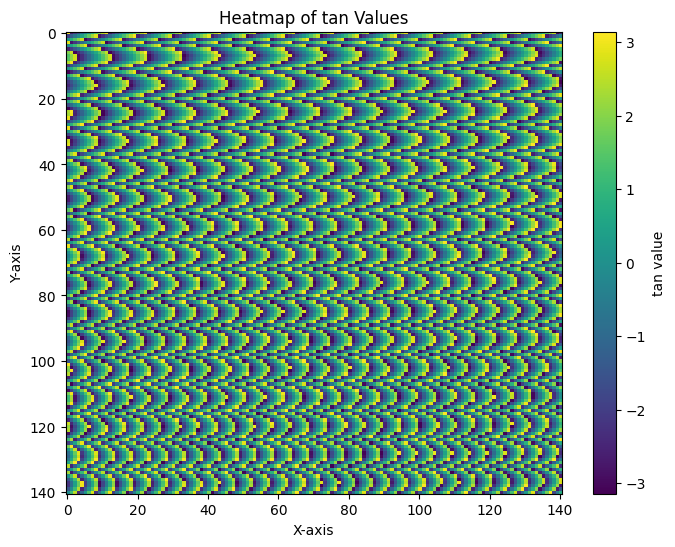

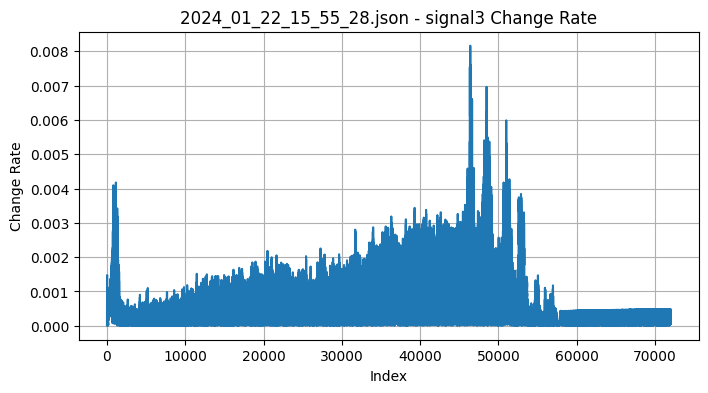

2024_01_22_15_55_28.json - signal3 Mean Change Rate: 0.0006971302702331493


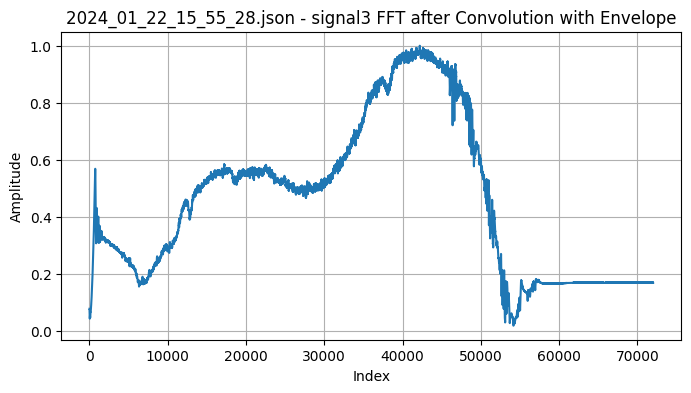

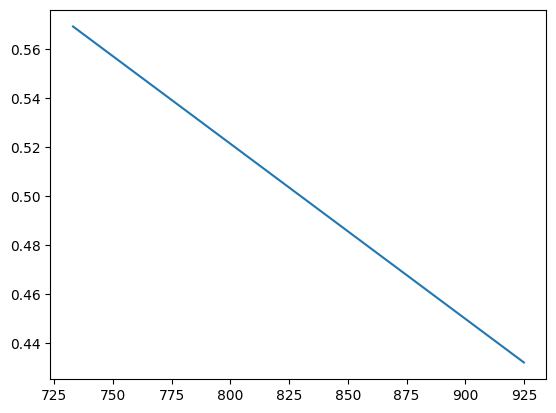

2024_01_22_15_55_28.json - signal3 Integral: 1314.2215899792147


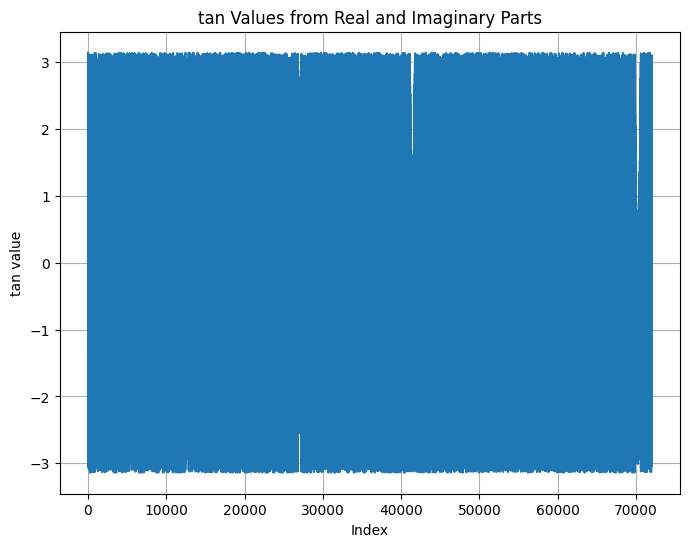

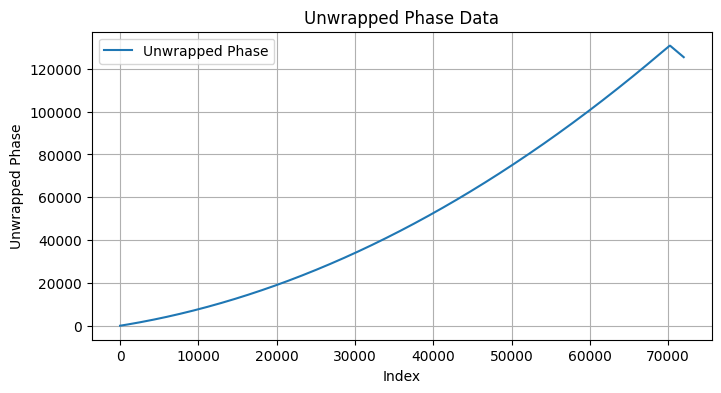

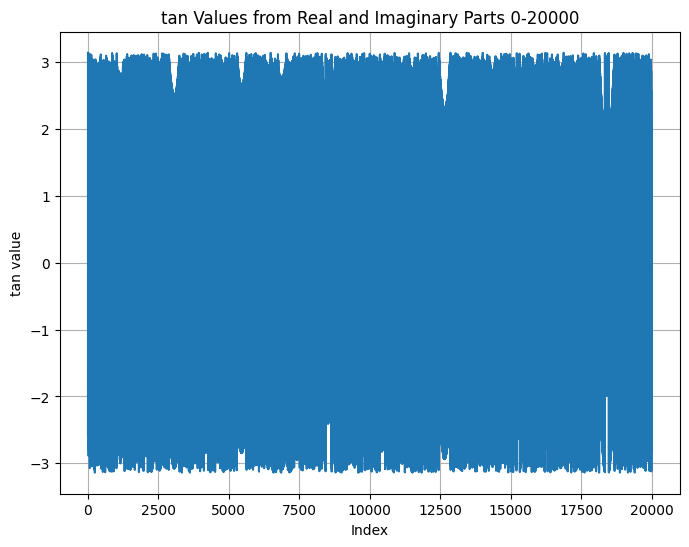

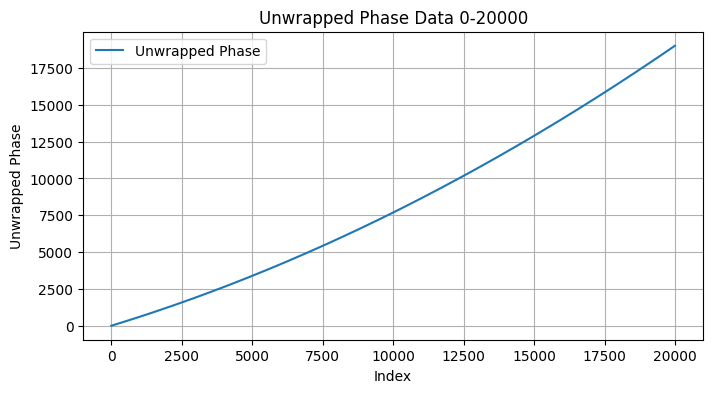

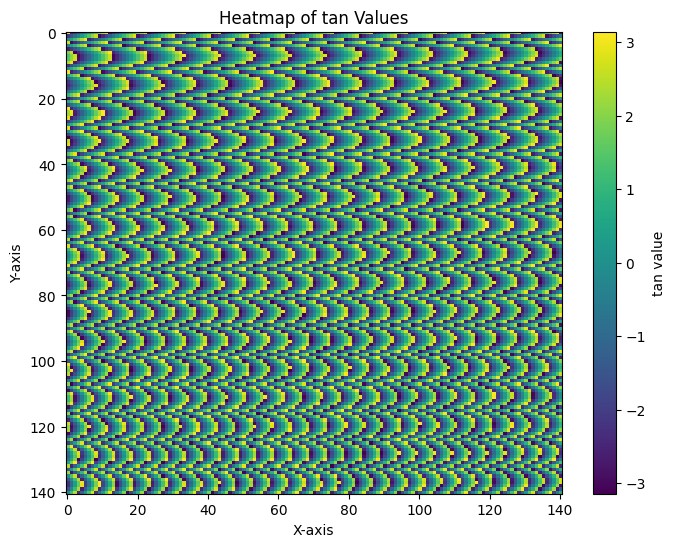

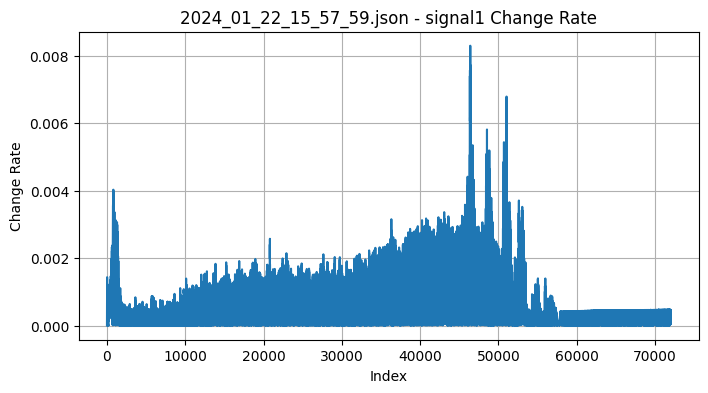

2024_01_22_15_57_59.json - signal1 Mean Change Rate: 0.0006791405083636861


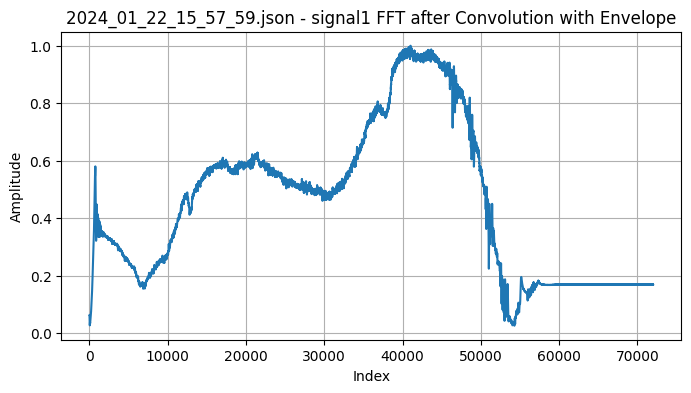

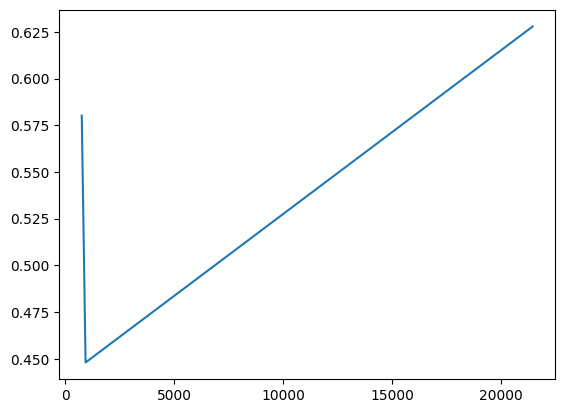

2024_01_22_15_57_59.json - signal1 Integral: 1374.698205252654


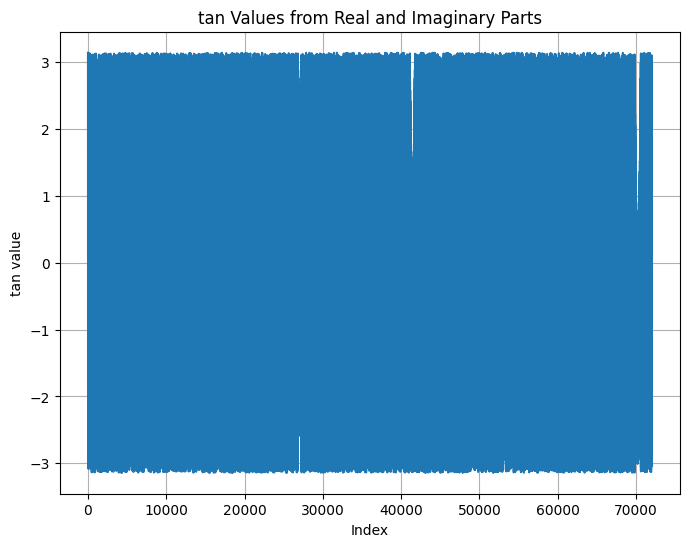

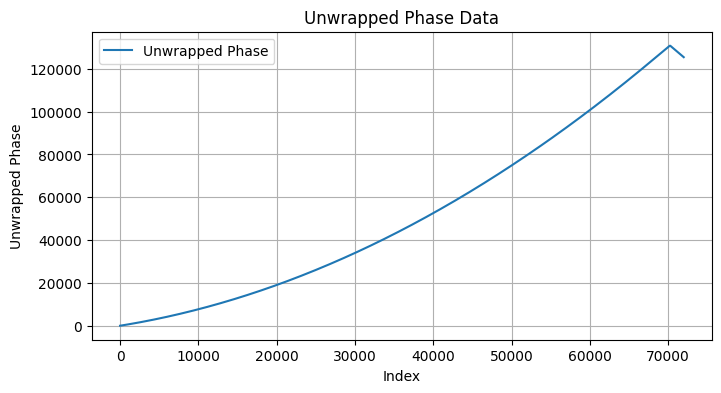

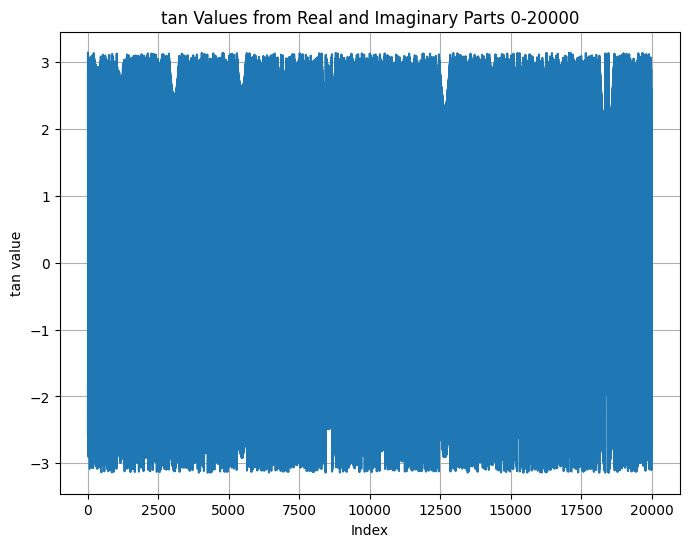

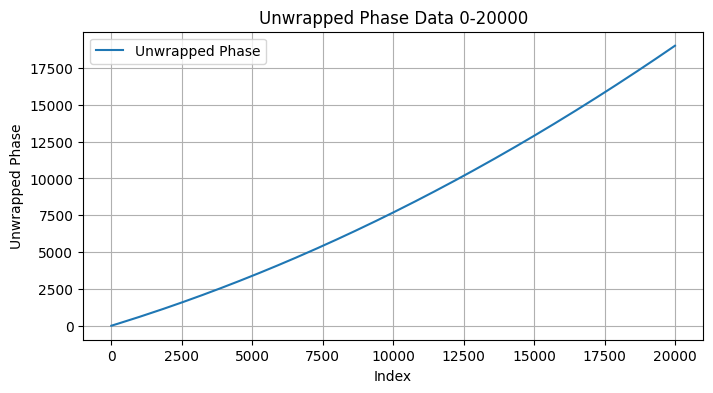

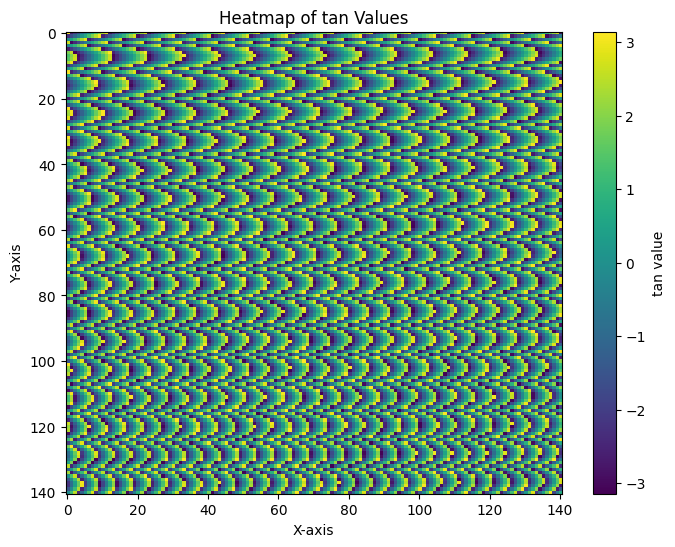

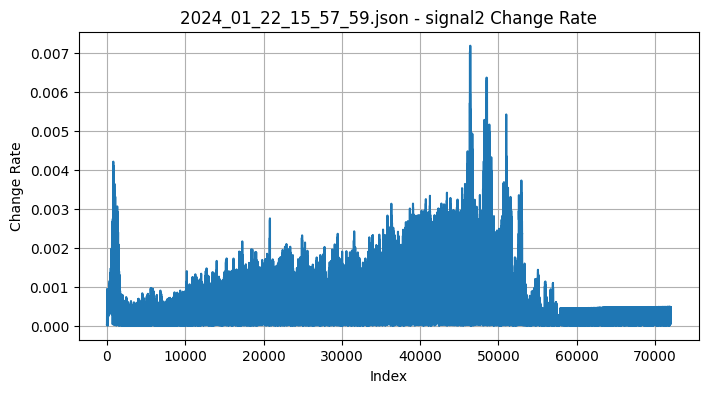

2024_01_22_15_57_59.json - signal2 Mean Change Rate: 0.0006873143247086006


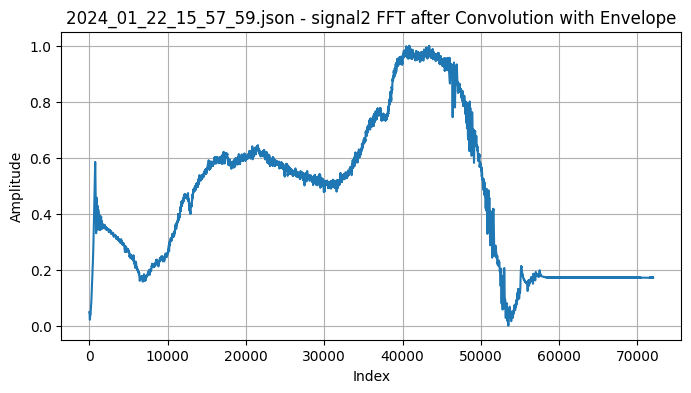

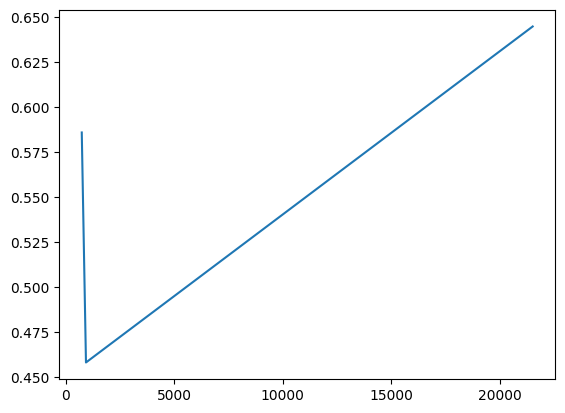

2024_01_22_15_57_59.json - signal2 Integral: 1396.8371456070597


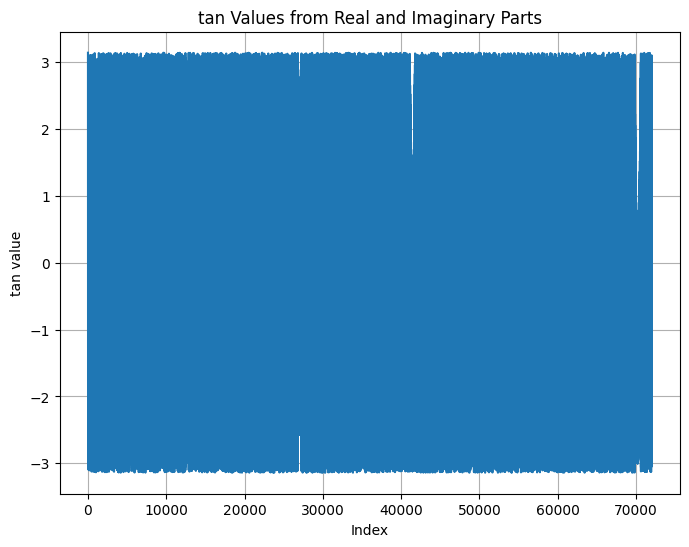

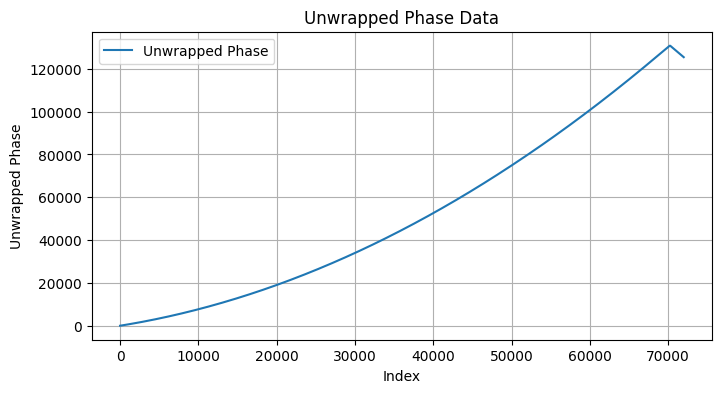

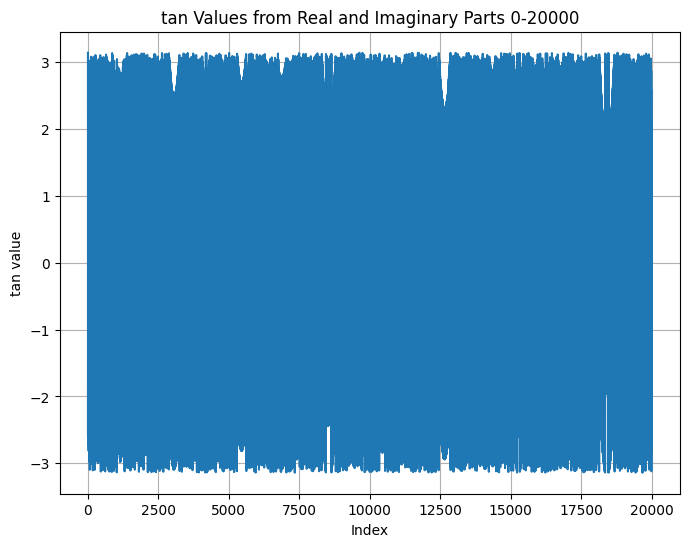

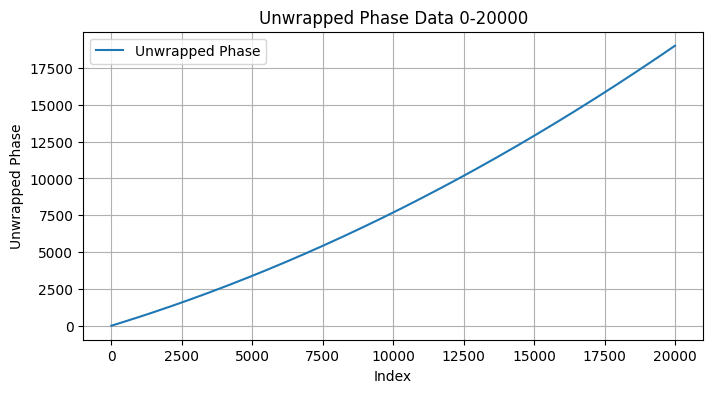

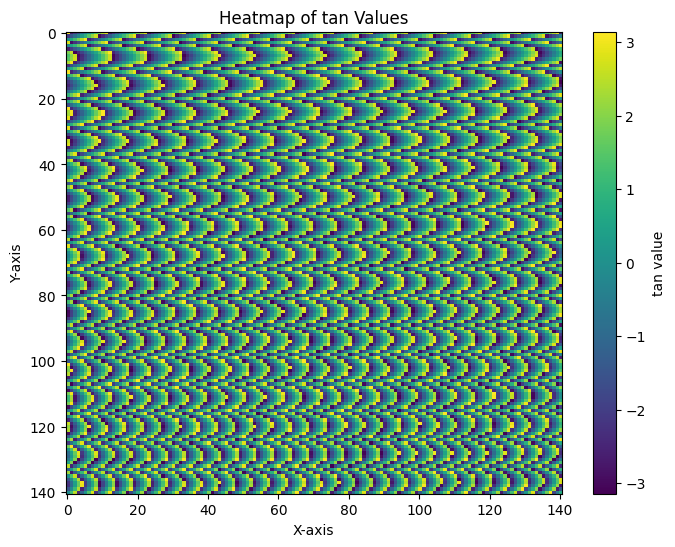

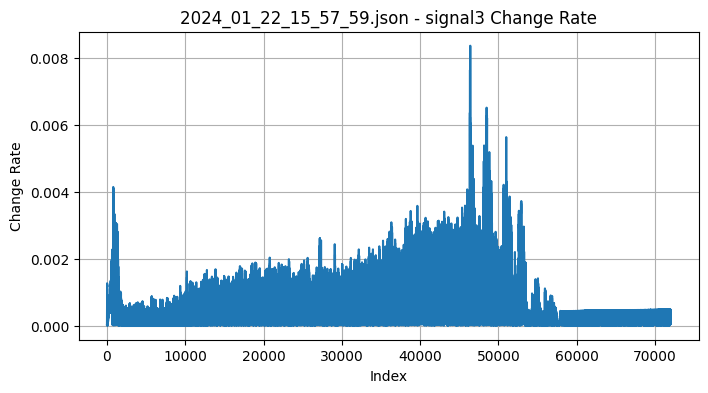

2024_01_22_15_57_59.json - signal3 Mean Change Rate: 0.0006899346461804271


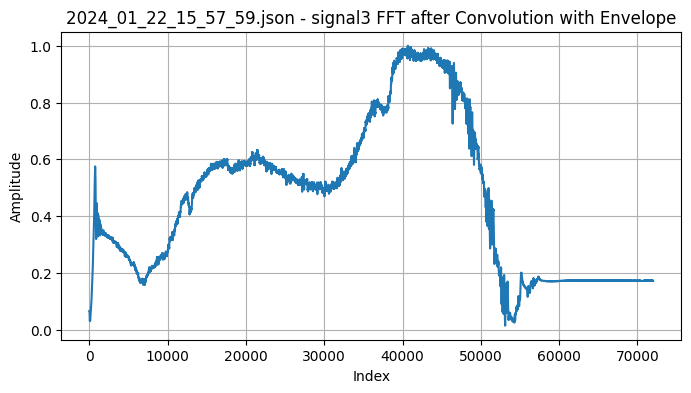

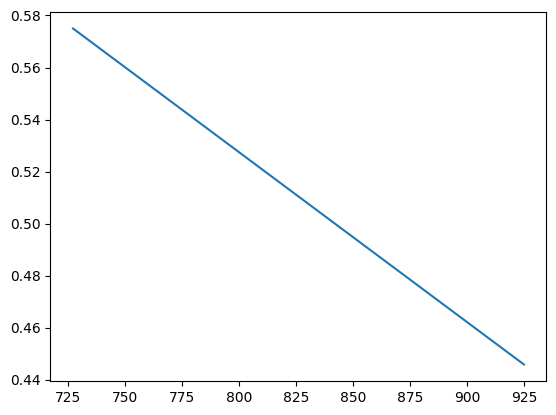

2024_01_22_15_57_59.json - signal3 Integral: 1375.4672465118597


In [21]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

FFT_list = []

#縦軸がおかしいですがグラフの形はスマホと同じです
def get_peak_index(fft_result_quarter, min_index):
  """FFT結果の指定された範囲内での最大値のインデックスを取得する

  Args:
    fft_result_quarter: FFT結果の1/4の範囲
    min_index: 範囲内の最低値のインデックス

  Returns:
    最大値のインデックス
  """

  fft_result_quarter_low_peak = fft_result_quarter[min_index: 36000]
  max_value = np.max(fft_result_quarter_low_peak)
  max_index = np.argmax(fft_result_quarter_low_peak)
  return max_index + min_index

# 区分求積
def trapezoidal_rule(data, dx):
  """台形公式による区分求積"""
  sum = 0.
  for i in range(len(data) - 1):
    sum += (data[i] + data[i + 1]) * dx / 2
  return sum

integral_values = []
mean_values = []
dates = []
signal_names = []

# FFT結果の平均と周波数軸の平均を保存するリスト
fft_means = []
freq_means = []

# 既に処理された日付を保持するリスト
processed_dates = []

for date, data in json_data.items():

        # データが辞書の場合
        if isinstance(data, dict):
            for signal_name, signal_data in data.items():
              # 信号データを最大値で正規化
              max_value = np.max(np.abs(signal_data))
              normalized_signal = signal_data / max_value

              # 絶対値の最大値のインデックスを取得
              abs_max_index = np.argmax(np.abs(normalized_signal))

              # 絶対値の最大値以降を取得し、8192点で切り抜く
              cropped_data = normalized_signal[abs_max_index: abs_max_index + 8192]

              # エンベロープとの畳み込み
              convolved_signal = np.convolve(cropped_data, env, mode='same')

              # FFTを計算
              fft_result = np.fft.fft(convolved_signal)
              freq_axis = np.fft.fftfreq(len(fft_result)) * sample_rate  # 周波数軸を作成

              # FFT結果の1/4を切り取る
              fft_result_quarter = fft_result[:len(fft_result) // 4]

              # 実部と虚部のデータからtanを計算
              real_part = np.real(fft_result_quarter)
              imaginary_part = np.imag(fft_result_quarter)

              FFT_list.append(np.abs(fft_result_quarter))

              tan_result = np.arctan2(imaginary_part, real_part)

              #アンラップ
              unwrapped_phase = np.copy(tan_result)

              for i in range(1, len(unwrapped_phase)):
                diff = unwrapped_phase[i] - unwrapped_phase[i - 1]
                # 位相のジャンプ（2πを超える変化）を検出し、補正する
                if diff > np.pi:
                    unwrapped_phase[i:] -= 2 * np.pi
                elif diff < -np.pi:
                    unwrapped_phase[i:] += 2 * np.pi

              plt.figure(figsize=(8, 6))
              plt.plot(tan_result)
              plt.xlabel('Index')
              plt.ylabel('tan value')
              plt.title('tan Values from Real and Imaginary Parts')
              plt.grid(True)
              plt.show()

              plt.figure(figsize=(8, 4))
              plt.plot(unwrapped_phase, label='Unwrapped Phase')
              plt.xlabel('Index')
              plt.ylabel('Unwrapped Phase')
              plt.title('Unwrapped Phase Data')
              plt.legend()
              plt.grid(True)
              plt.show()

              start_index = 0
              end_index = 20000
              tan_result = tan_result[start_index:end_index]

              # グラフ化
              plt.figure(figsize=(8, 6))
              plt.plot(tan_result)
              plt.xlabel('Index')
              plt.ylabel('tan value')
              plt.title('tan Values from Real and Imaginary Parts 0-20000')
              plt.grid(True)
              plt.show()

              #アンラップ
              unwrapped_phase = np.copy(tan_result)
              for i in range(1, len(unwrapped_phase)):
                diff = unwrapped_phase[i] - unwrapped_phase[i - 1]
                # 位相のジャンプ（2πを超える変化）を検出し、補正する
                if diff > np.pi:
                    unwrapped_phase[i:] -= 2 * np.pi
                elif diff < -np.pi:
                    unwrapped_phase[i:] += 2 * np.pi

              plt.figure(figsize=(8, 4))
              plt.plot(unwrapped_phase, label='Unwrapped Phase')
              plt.xlabel('Index')
              plt.ylabel('Unwrapped Phase')
              plt.title('Unwrapped Phase Data 0-20000')
              plt.legend()
              plt.grid(True)
              plt.show()

              # tanの値を行列として扱う
              size = int(np.sqrt(len(tan_result)))  # サイズを計算
              tan_matrix = np.reshape(tan_result[:size*size], (size, size))

              # ヒートマップの表示
              plt.figure(figsize=(8, 6))
              plt.imshow(tan_matrix, cmap='viridis', aspect='auto')
              plt.colorbar(label='tan value')
              plt.title('Heatmap of tan Values')
              plt.xlabel('X-axis')
              plt.ylabel('Y-axis')
              plt.show()

              # fft_result_quarterを正規化
              norm = np.max(np.abs(fft_result_quarter))
              fft_result_quarter = fft_result_quarter / norm

              # 指定された範囲内の周波数軸を取得
              freq_axis_quarter = freq_axis[:len(fft_result_quarter)]

              # 指定された範囲内のFFT結果と周波数軸の平均を計算
              fft_result_mean = np.mean(np.abs(fft_result_quarter[:len(fft_result_quarter) // 2]))
              freq_axis_mean = np.mean(freq_axis_quarter[:len(freq_axis_quarter) // 2])

              # 変化率を計算する
              fft_result_diff = np.abs(np.diff(np.abs(fft_result_quarter)))

              # 変化率のグラフを作成
              plt.figure(figsize=(8, 4))
              plt.plot(np.arange(len(fft_result_diff)), fft_result_diff)
              plt.title(f'{date} - {signal_name} Change Rate')
              plt.xlabel('Index')
              plt.ylabel('Change Rate')
              plt.grid(True)
              plt.show()

              # 平均値を計算し、標準出力に表示
              mean_change_rate = np.mean(fft_result_diff)
              print(f'{date} - {signal_name} Mean Change Rate:', mean_change_rate)

              # FFT結果のプロット
              plt.figure(figsize=(8, 4))
              plt.plot(np.arange(len(fft_result_quarter)), np.abs(fft_result_quarter))  # 横軸をインデックス、縦軸を振幅としてプロット
              plt.title(f'{date} - {signal_name} FFT after Convolution with Envelope')
              plt.xlabel('Index')
              plt.ylabel('Amplitude')
              plt.grid(True)
              plt.show()

              # ピーク値の取得
              peaks = scipy.signal.find_peaks(np.abs(fft_result_quarter[0:(25000)]), prominence=0.1)
              # ピーク値のインデックスを取得
              peak_indices = peaks[0]
              # 全てのピークをグラフで表示
              plt.plot(peak_indices, np.abs(fft_result_quarter[peak_indices]))
              plt.show()

              # 区分求積
              dx = freq_axis_quarter[1] - freq_axis_quarter[0]
              integral = trapezoidal_rule(np.abs(fft_result_quarter[9000:(25000)]), dx)
              print(f'{date} - {signal_name} Integral:', integral)

              # 結果を保存する
              integral_values.append(np.amax(fft_result_quarter))#ピーク１最大値
              mean_values.append(integral)#面積
              dates.append(date)
              signal_names.append(signal_name)

              fft_means.append(np.amax(fft_result_quarter))


<ipython-input-22-b3486fb54c2c>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20c', len(pca_result) // 3)  # カラーマップから色を取得


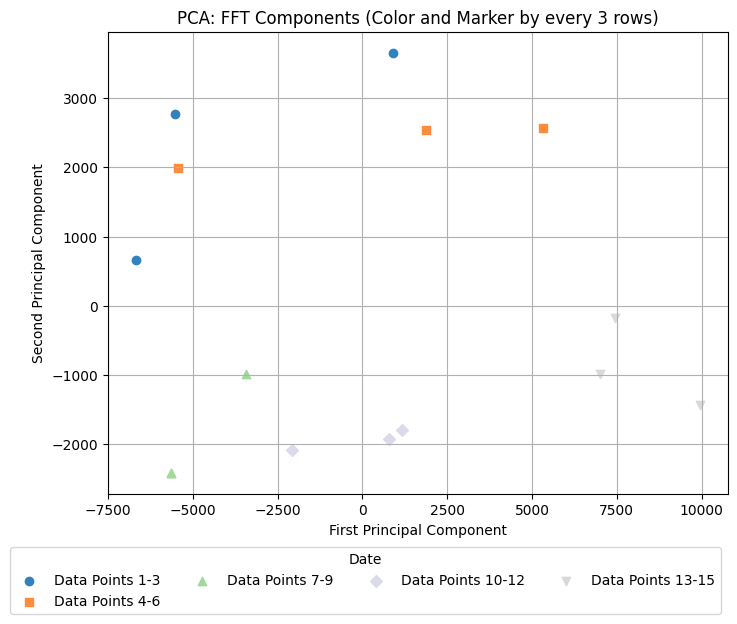

In [22]:
# FFTリストをNumPy配列に変換
matrix = np.array(FFT_list)

# 主成分分析を実行
pca = PCA(n_components=2)
pca_result = pca.fit_transform(matrix)

# CSS4カラーマップを利用して色を取得
colors = plt.cm.get_cmap('tab20c', len(pca_result) // 3)  # カラーマップから色を取得
markers = ['o', 's', '^', 'D', 'v']  # マーカーのリスト

plt.figure(figsize=(8, 6))

# 3行ごとに異なる色とマーカーを使ってプロット
for i in range(0, len(pca_result), 3):
    color_index = i // 3
    marker_index = i // 3 % len(markers)
    plt.scatter(pca_result[i:i+3, 0], pca_result[i:i+3, 1],
                label=f'Data Points {i+1}-{i+3}',
                color=colors(color_index), marker=markers[marker_index])

plt.title('PCA: FFT Components (Color and Marker by every 3 rows)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# 凡例を別の表として表示
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right', fontsize=10, ncol=4, title='Date',bbox_to_anchor=(1, -0.1))

plt.grid(True)
plt.show()


<ipython-input-23-18ac06b3753d>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20c', len(pca_result) // 3)  # カラーマップから色を取得


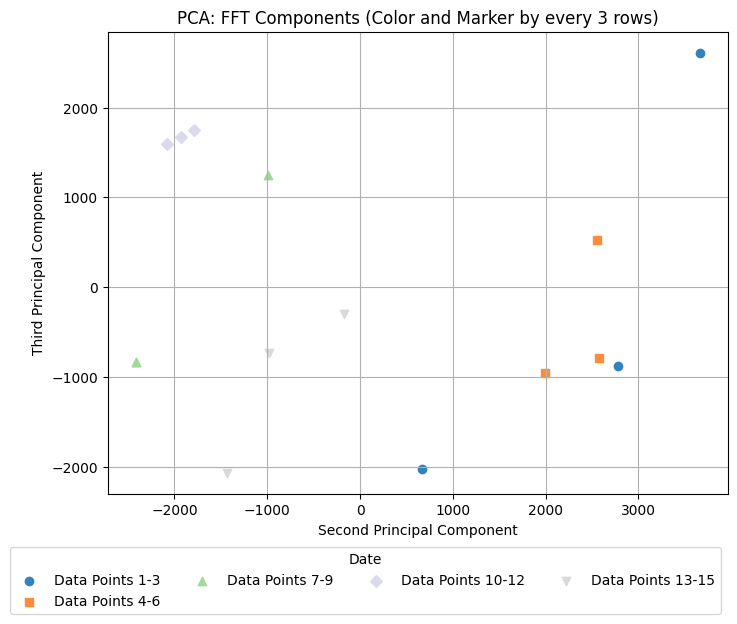

In [23]:
# FFTリストをNumPy配列に変換
matrix = np.array(FFT_list)

# 主成分分析を実行
pca = PCA(n_components=3)
pca_result = pca.fit_transform(matrix)

# CSS4カラーマップを利用して色を取得
colors = plt.cm.get_cmap('tab20c', len(pca_result) // 3)  # カラーマップから色を取得
markers = ['o', 's', '^', 'D', 'v']  # マーカーのリスト

plt.figure(figsize=(8, 6))

# 3行ごとに異なる色とマーカーを使ってプロット
for i in range(0, len(pca_result), 3):
    color_index = i // 3
    marker_index = i // 3 % len(markers)
    plt.scatter(pca_result[i:i+3, 1], pca_result[i:i+3, 2],
                label=f'Data Points {i+1}-{i+3}',
                color=colors(color_index), marker=markers[marker_index])

plt.title('PCA: FFT Components (Color and Marker by every 3 rows)')
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')

# 凡例を別の表として表示
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right', fontsize=10, ncol=4, title='Date',bbox_to_anchor=(1, -0.1))

plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


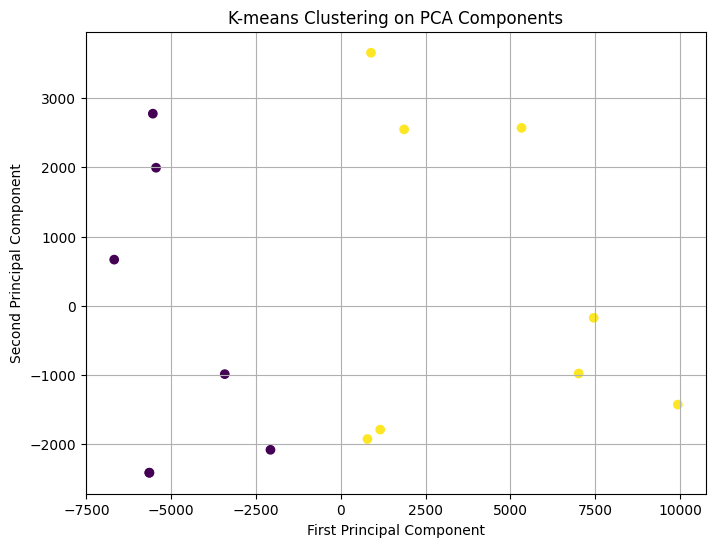

In [24]:
from sklearn.cluster import KMeans

# FFTリストをNumPy配列に変換
matrix = np.array(FFT_list)

# K-meansクラスタリングを実行（ここではクラスタ数を3とします）
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(pca_result)

# クラスタリング結果をプロット
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering on PCA Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()


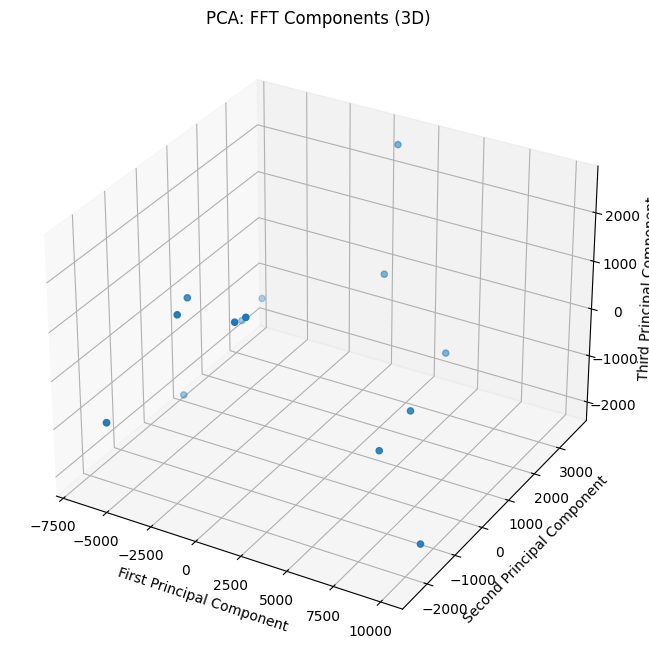

In [25]:
# FFTリストをNumPy配列に変換
matrix = np.array(FFT_list)

# 主成分分析を実行
pca = PCA(n_components=3)  # 3つの主成分を取得する
pca_result = pca.fit_transform(matrix)

# 第一主成分、第二主成分、第三主成分でプロット
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
ax.set_title('PCA: FFT Components (3D)')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


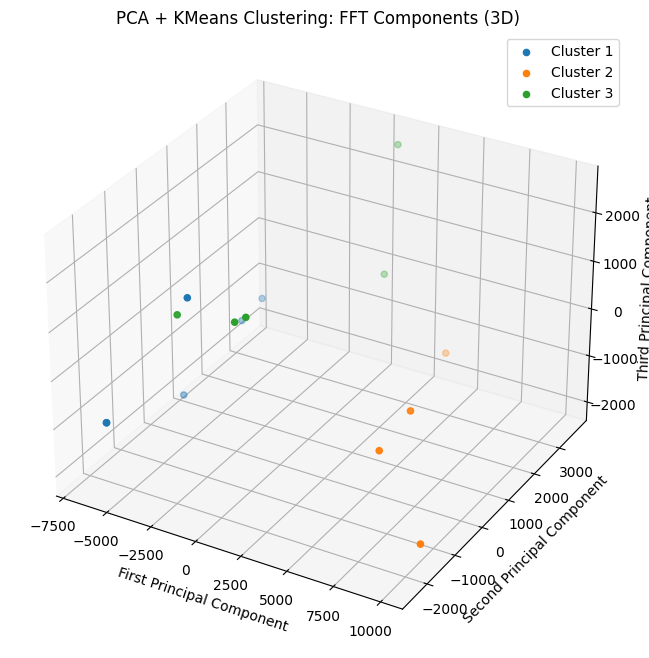

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_result)
labels = kmeans.labels_

# 3Dプロットにクラスタを表示
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 各クラスタごとに色を変えてプロット
for cluster_label in range(max(labels) + 1):
    cluster_indices = pca_result[labels == cluster_label]
    ax.scatter(cluster_indices[:, 0], cluster_indices[:, 1], cluster_indices[:, 2], label=f'Cluster {cluster_label + 1}')

ax.set_title('PCA + KMeans Clustering: FFT Components (3D)')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


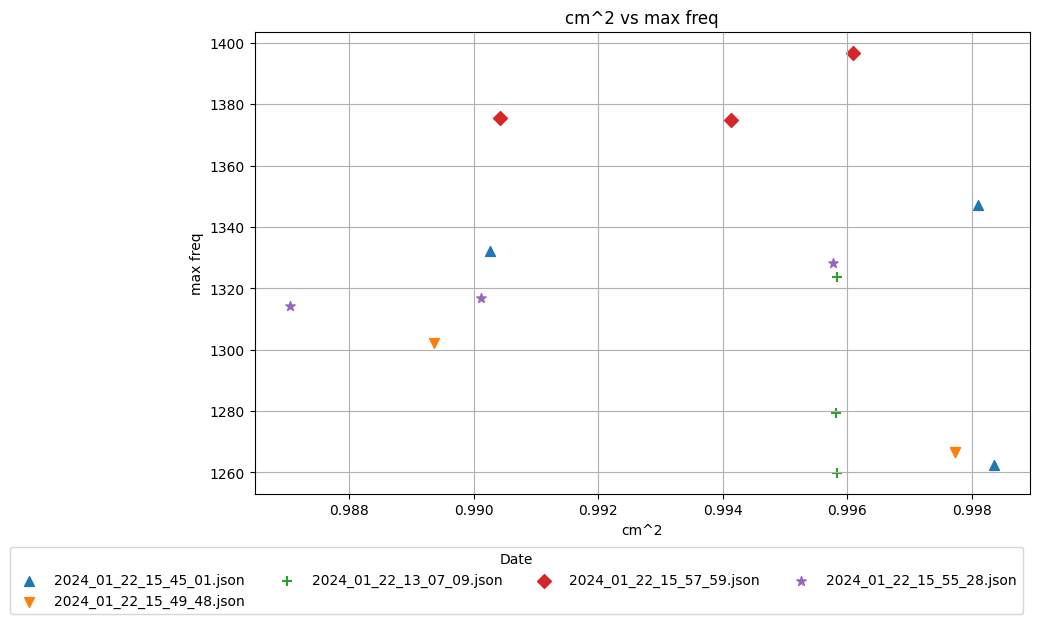

In [27]:
# 縦軸ピーク２振幅最大値、横軸同条件周波数の散布図
plt.figure(figsize=(10, 6))
for date in set(dates):
    indices = [i for i, d in enumerate(dates) if d == date]
    plt.scatter(
        np.array(integral_values)[indices],
        np.array(mean_values)[indices],
        label=date,
        marker=[
            'o', 's', '^', 'D', 'x', '+', '*', 'p', 'h', 'v'
        ][(len(set(dates)) - indices[0]) % len([
            'o', 's', '^', 'D', 'x', '+', '*', 'p', 'h', 'v'
        ])],
        s=50  # マーカーサイズ
    )

plt.title('cm^2 vs max freq')
plt.xlabel('cm^2')
plt.ylabel('max freq')

# 凡例を別の表として表示
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right', fontsize=10, ncol=4, title='Date',bbox_to_anchor=(1, -0.1))

plt.grid(True)
plt.show()
